# Project : House Prices: Advanced Regression Techniques
---

## 1. Data Introduce
### 1.1 Purpose :   Predict SalePrice

### 1.2 Data set:
   > - Use house data in Ames. Iowa
   
   > - Train Data : It consists of 81 variables and 1460 house data

   > - Test Data  : It consists of 80 variables and 1459 house data

   > - Total Data : 2919 house data
   > - [Source : House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques "House Prices: Advanced Regression Techniques")

### 1.3 Evaluation
   > - Root-Mean-Squared-Error (RMSE)  

$$
RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}
$$


### 2. Exploring the Data 
Let's start with importing the necessary libaries, reading in the data and checking out the dataset.

Note that the last column from this dataset, 'SalePrice' will be our target label. All other columns are features about each individual in house database

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy.stats import norm, skew 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline

# Allows the use of display() for DataFrames
from IPython.display import display 

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("./Input/train.csv")
test = pd.read_csv("./Input/test.csv")

# Success - Display the first record
display(train.head(n=1))

/Users/sunghwanki/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  

[1 rows x 81 columns]

#### (1) Check data

In [2]:
print("Train data : ", train.shape)
print("Test  data : ", test.shape)

Train data :  (1460, 81)
Test  data :  (1459, 80)


#### Comments :
There are 1460 instances of training data and 1460 of test data. Total number of attributes equals 81

#### (2) Status of Train data

In [3]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

#### Comment :
1. Count :Some data such as LotFrontage and MasVnrArea are lost
2. Mean & 50% : Some data is biased to a certain value

#### (3) Explore SalePrice 

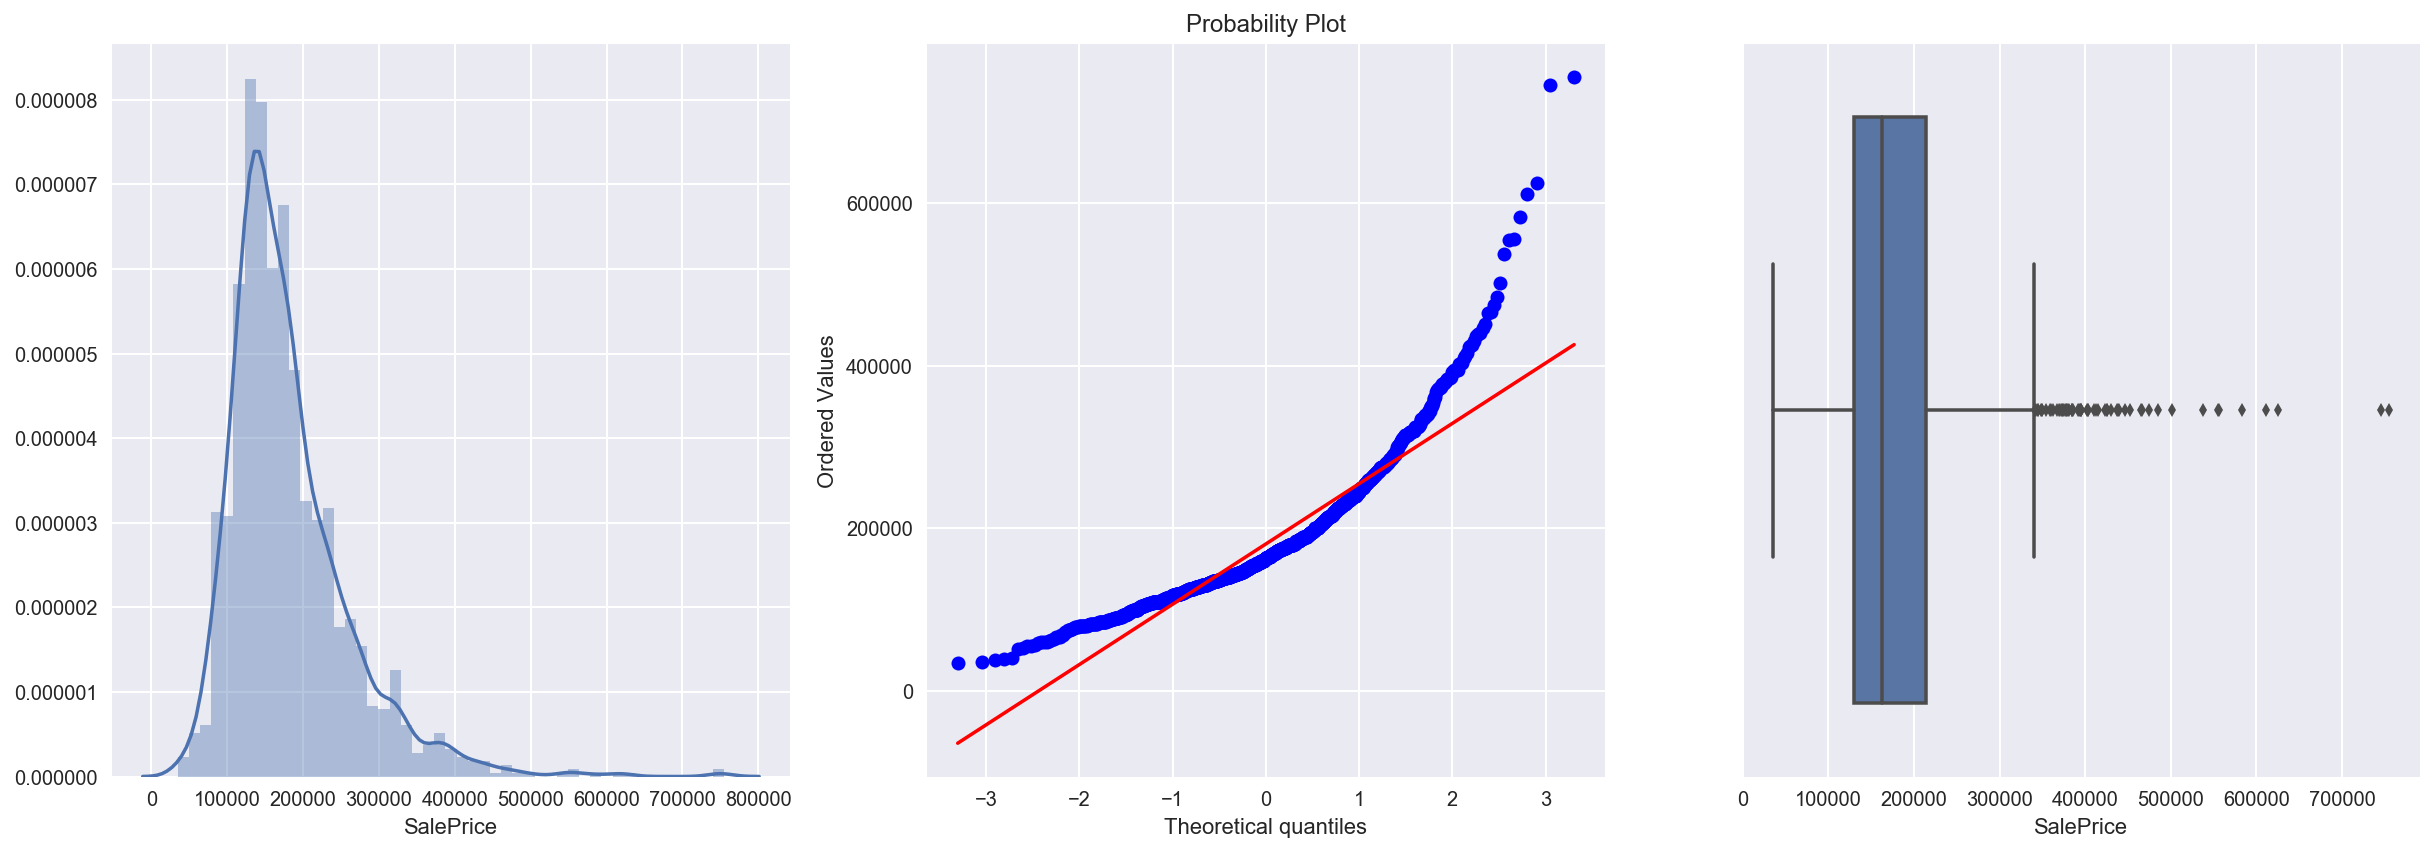

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64 

Skewness: 1.882876
Kurtosis: 6.536282


In [4]:
plt.figure(figsize=(17,6))

plt.subplot(131)
sns.distplot(train["SalePrice"])

plt.subplot(132)
stats.probplot(train["SalePrice"], plot=plt)

plt.subplot(133)
sns.boxplot(train["SalePrice"])
plt.tight_layout()
plt.show()

print(train["SalePrice"].describe(),"\n")

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

#### Comments :
1. It is apparent that SalePrice doesn't follow normal distribution and has positive skewness.

#### (4) SalePrice log transformation

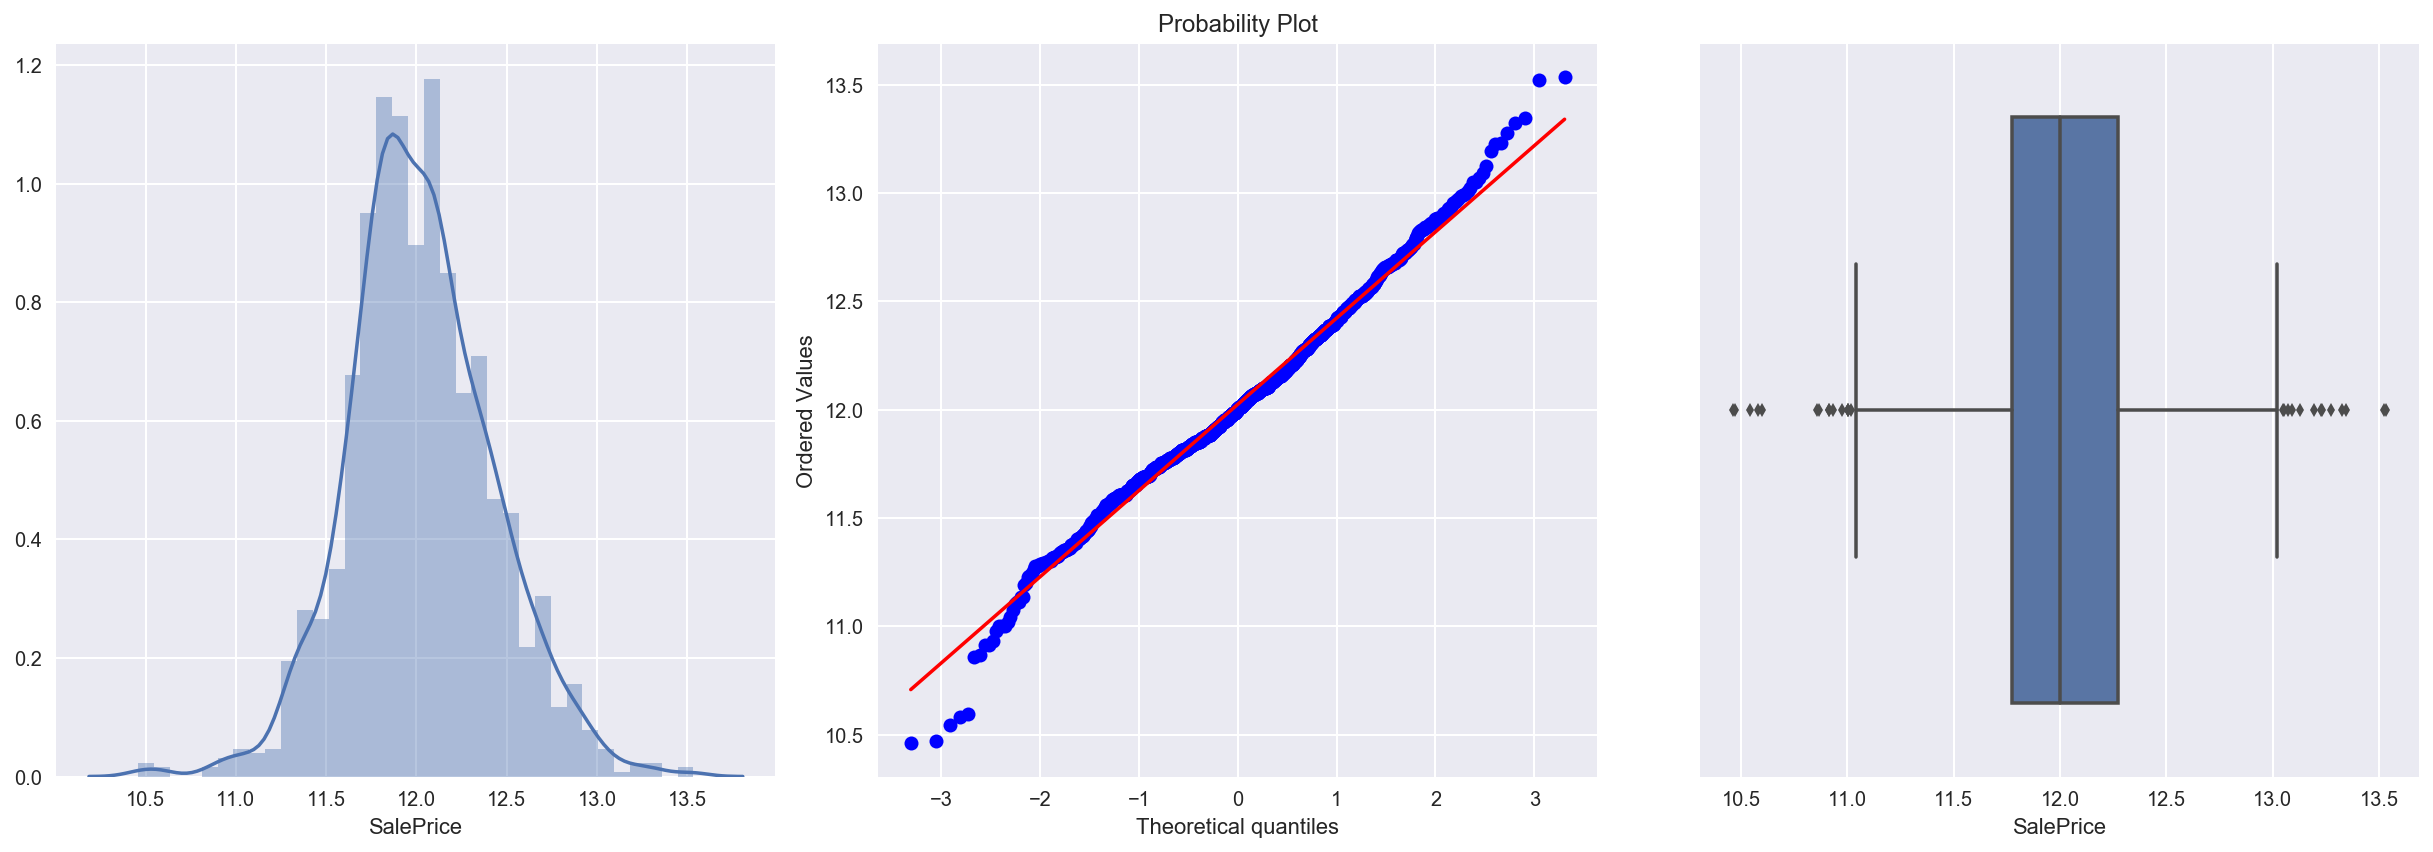

In [5]:
nomalized_SalePrice = np.log1p(train["SalePrice"])

plt.figure(figsize=(17,6))

plt.subplot(131)
sns.distplot(nomalized_SalePrice)

plt.subplot(132)
stats.probplot(nomalized_SalePrice, plot=plt)

plt.subplot(133)
sns.boxplot(nomalized_SalePrice)
plt.tight_layout()
plt.show()

#### Comment:
1. After log transformation, it seems to follow normal distribution.

### 2-2 Feature Type

#### (1) Check Numerical and Catergorical variables

In [6]:
# Because the MSSubClass variable is a category value, change numeric data to character data
train["MSSubClass"] = train["MSSubClass"].astype('str')

In [7]:
# Divide into numeric and categorical variables
numerical_features = []
categorical_features = []
for f in train.columns:
    if train.dtypes[f] != 'object':
        numerical_features.append(f)
    else:
        categorical_features.append(f)

In [8]:
print("Numerical Features Qty :", len(numerical_features),"\n")
print("Numerical Features : ", numerical_features, "\n\n")
print("Categorical Features Qty :", len(categorical_features),"\n")
print("Categorical Features :", categorical_features)

Numerical Features Qty : 37 

Numerical Features :  ['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] 


Categorical Features Qty : 44 

Categorical Features : ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC

#### (2) Graph for numerical features with  SalePrice
It also would be useful to see how sale price compares to each independent variable.

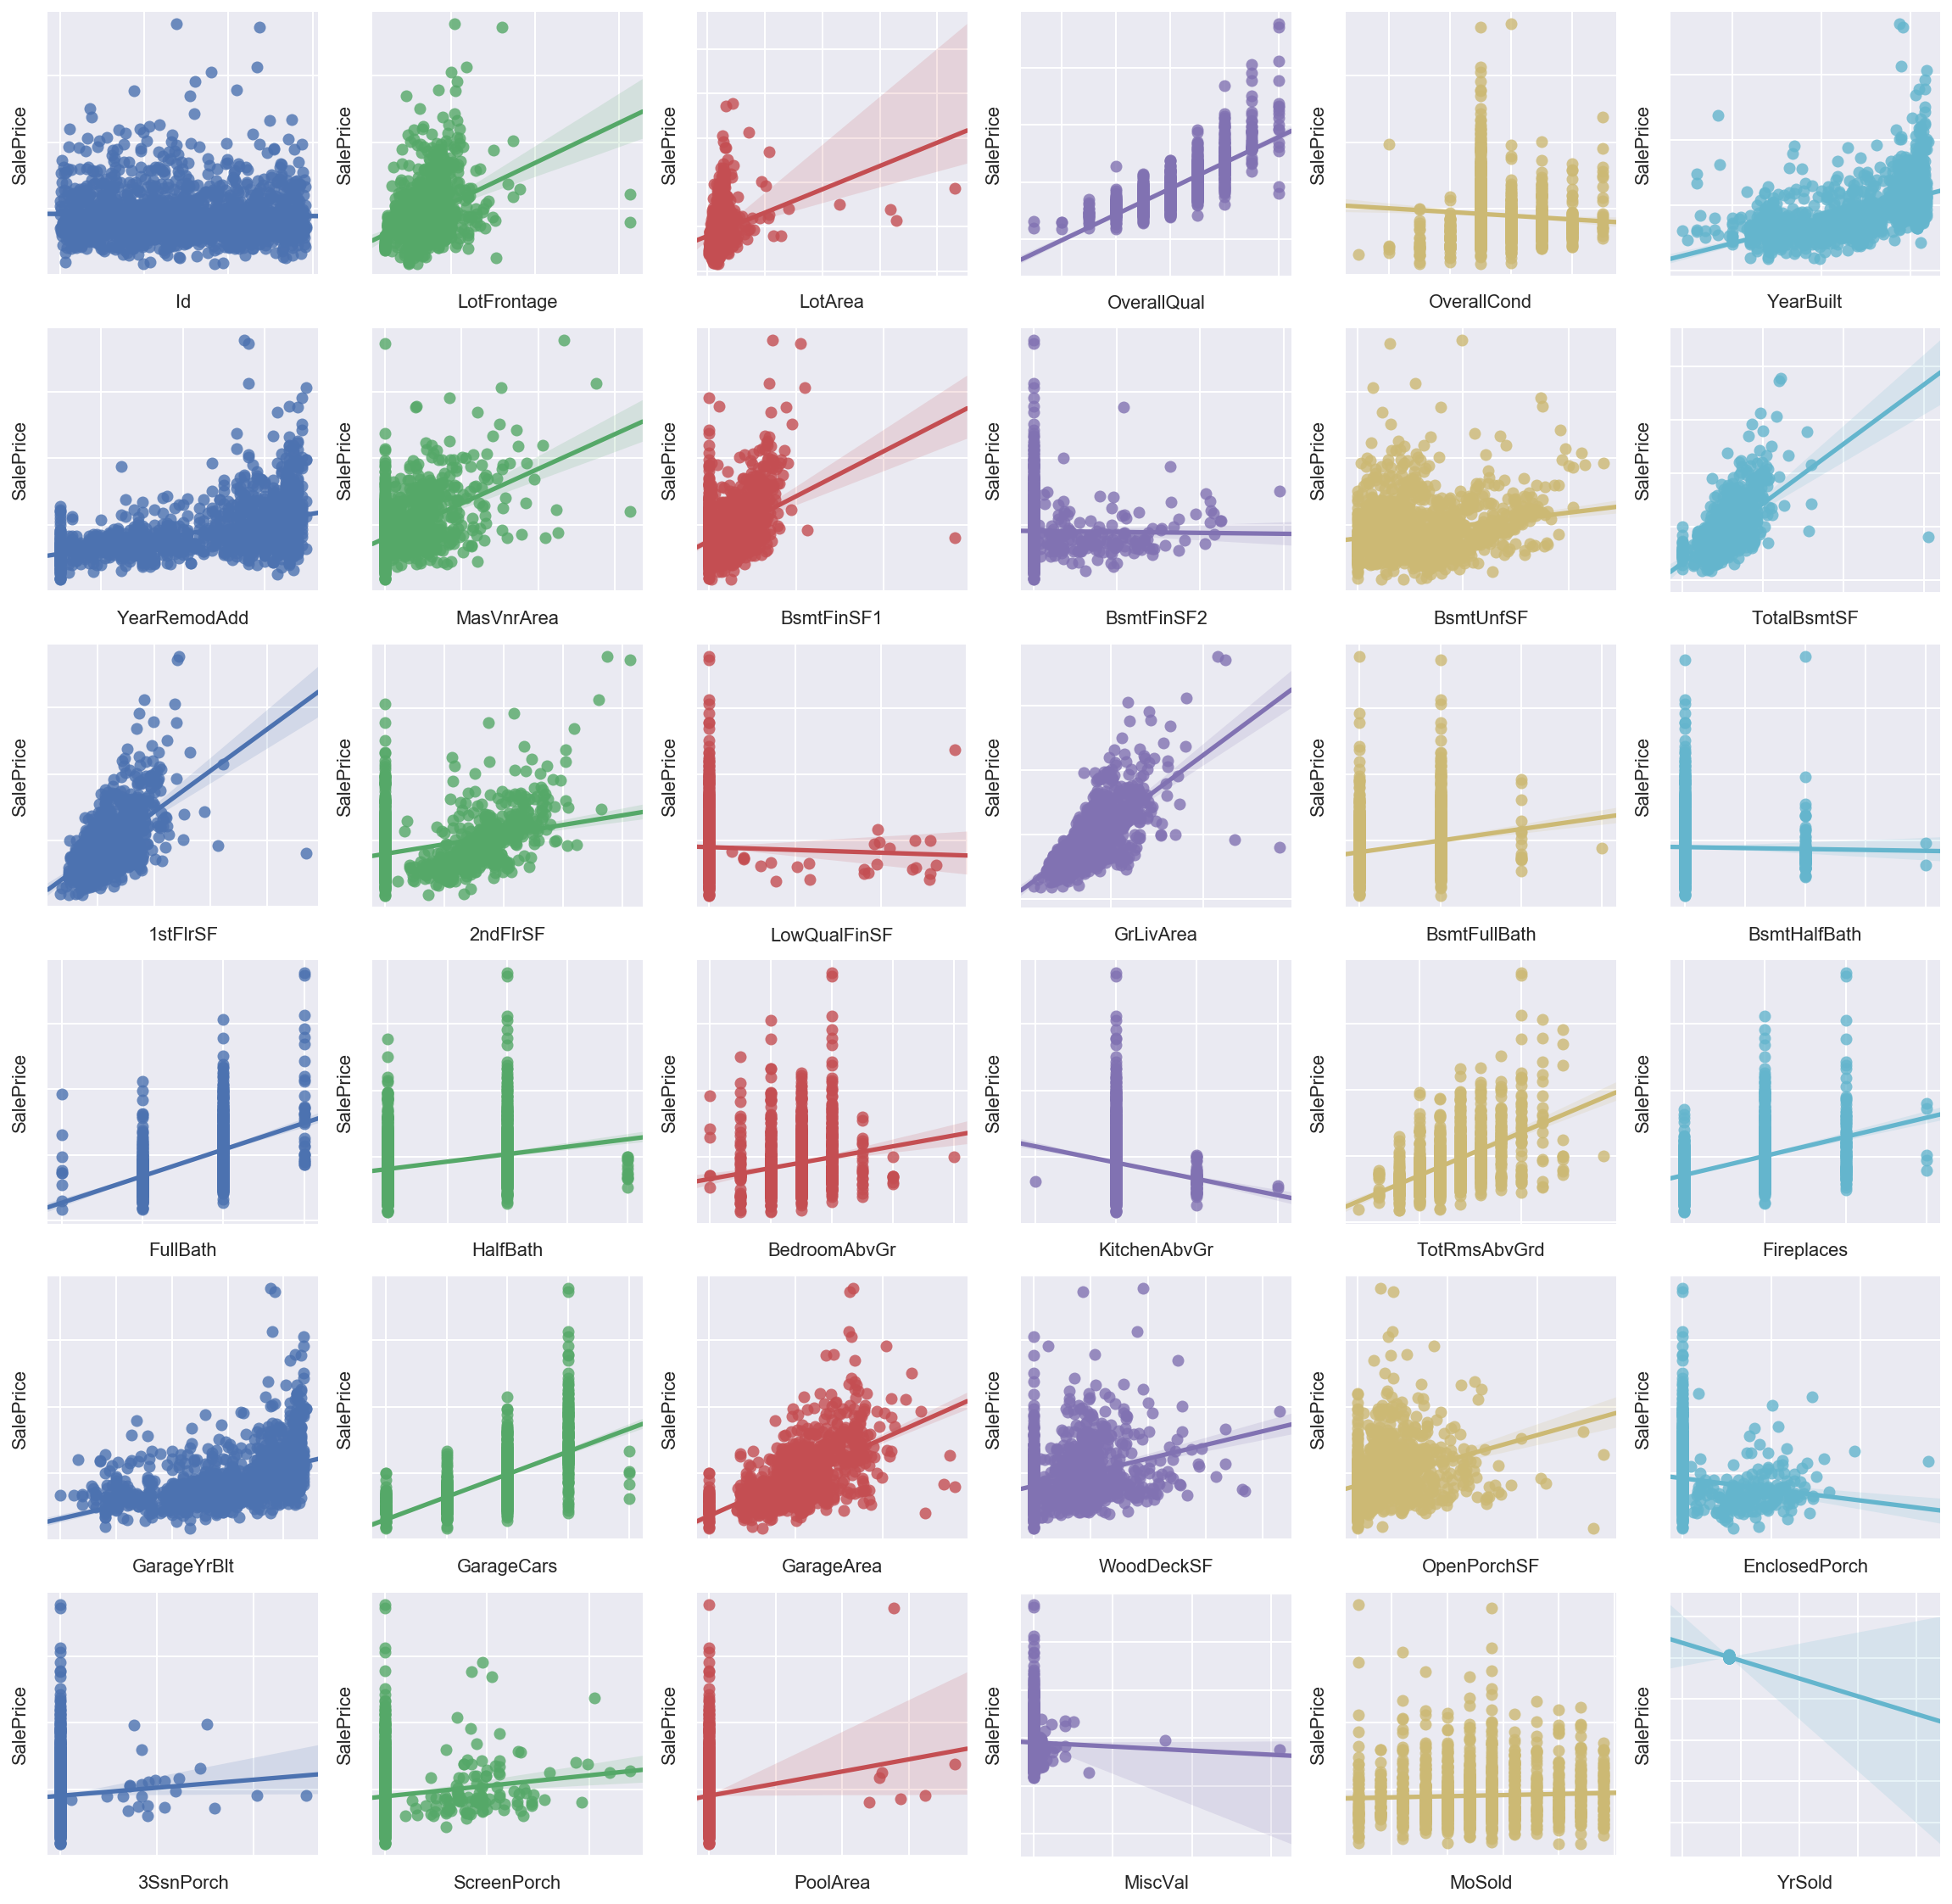

In [9]:
fig, ax = plt.subplots(6,6, figsize = (20,20))

for idx, n in enumerate(numerical_features):
    if n == 'SalePrice':
        continue
    sns.regplot(x=n, y='SalePrice', data=train, ax = ax[idx//6,idx%6])
    ax[idx//6, idx % 6].set(yticklabels=[])
    ax[idx//6, idx % 6].set(xticklabels=[])
    
    continue   

#### (3) Graph for categorical features with  SalePrice

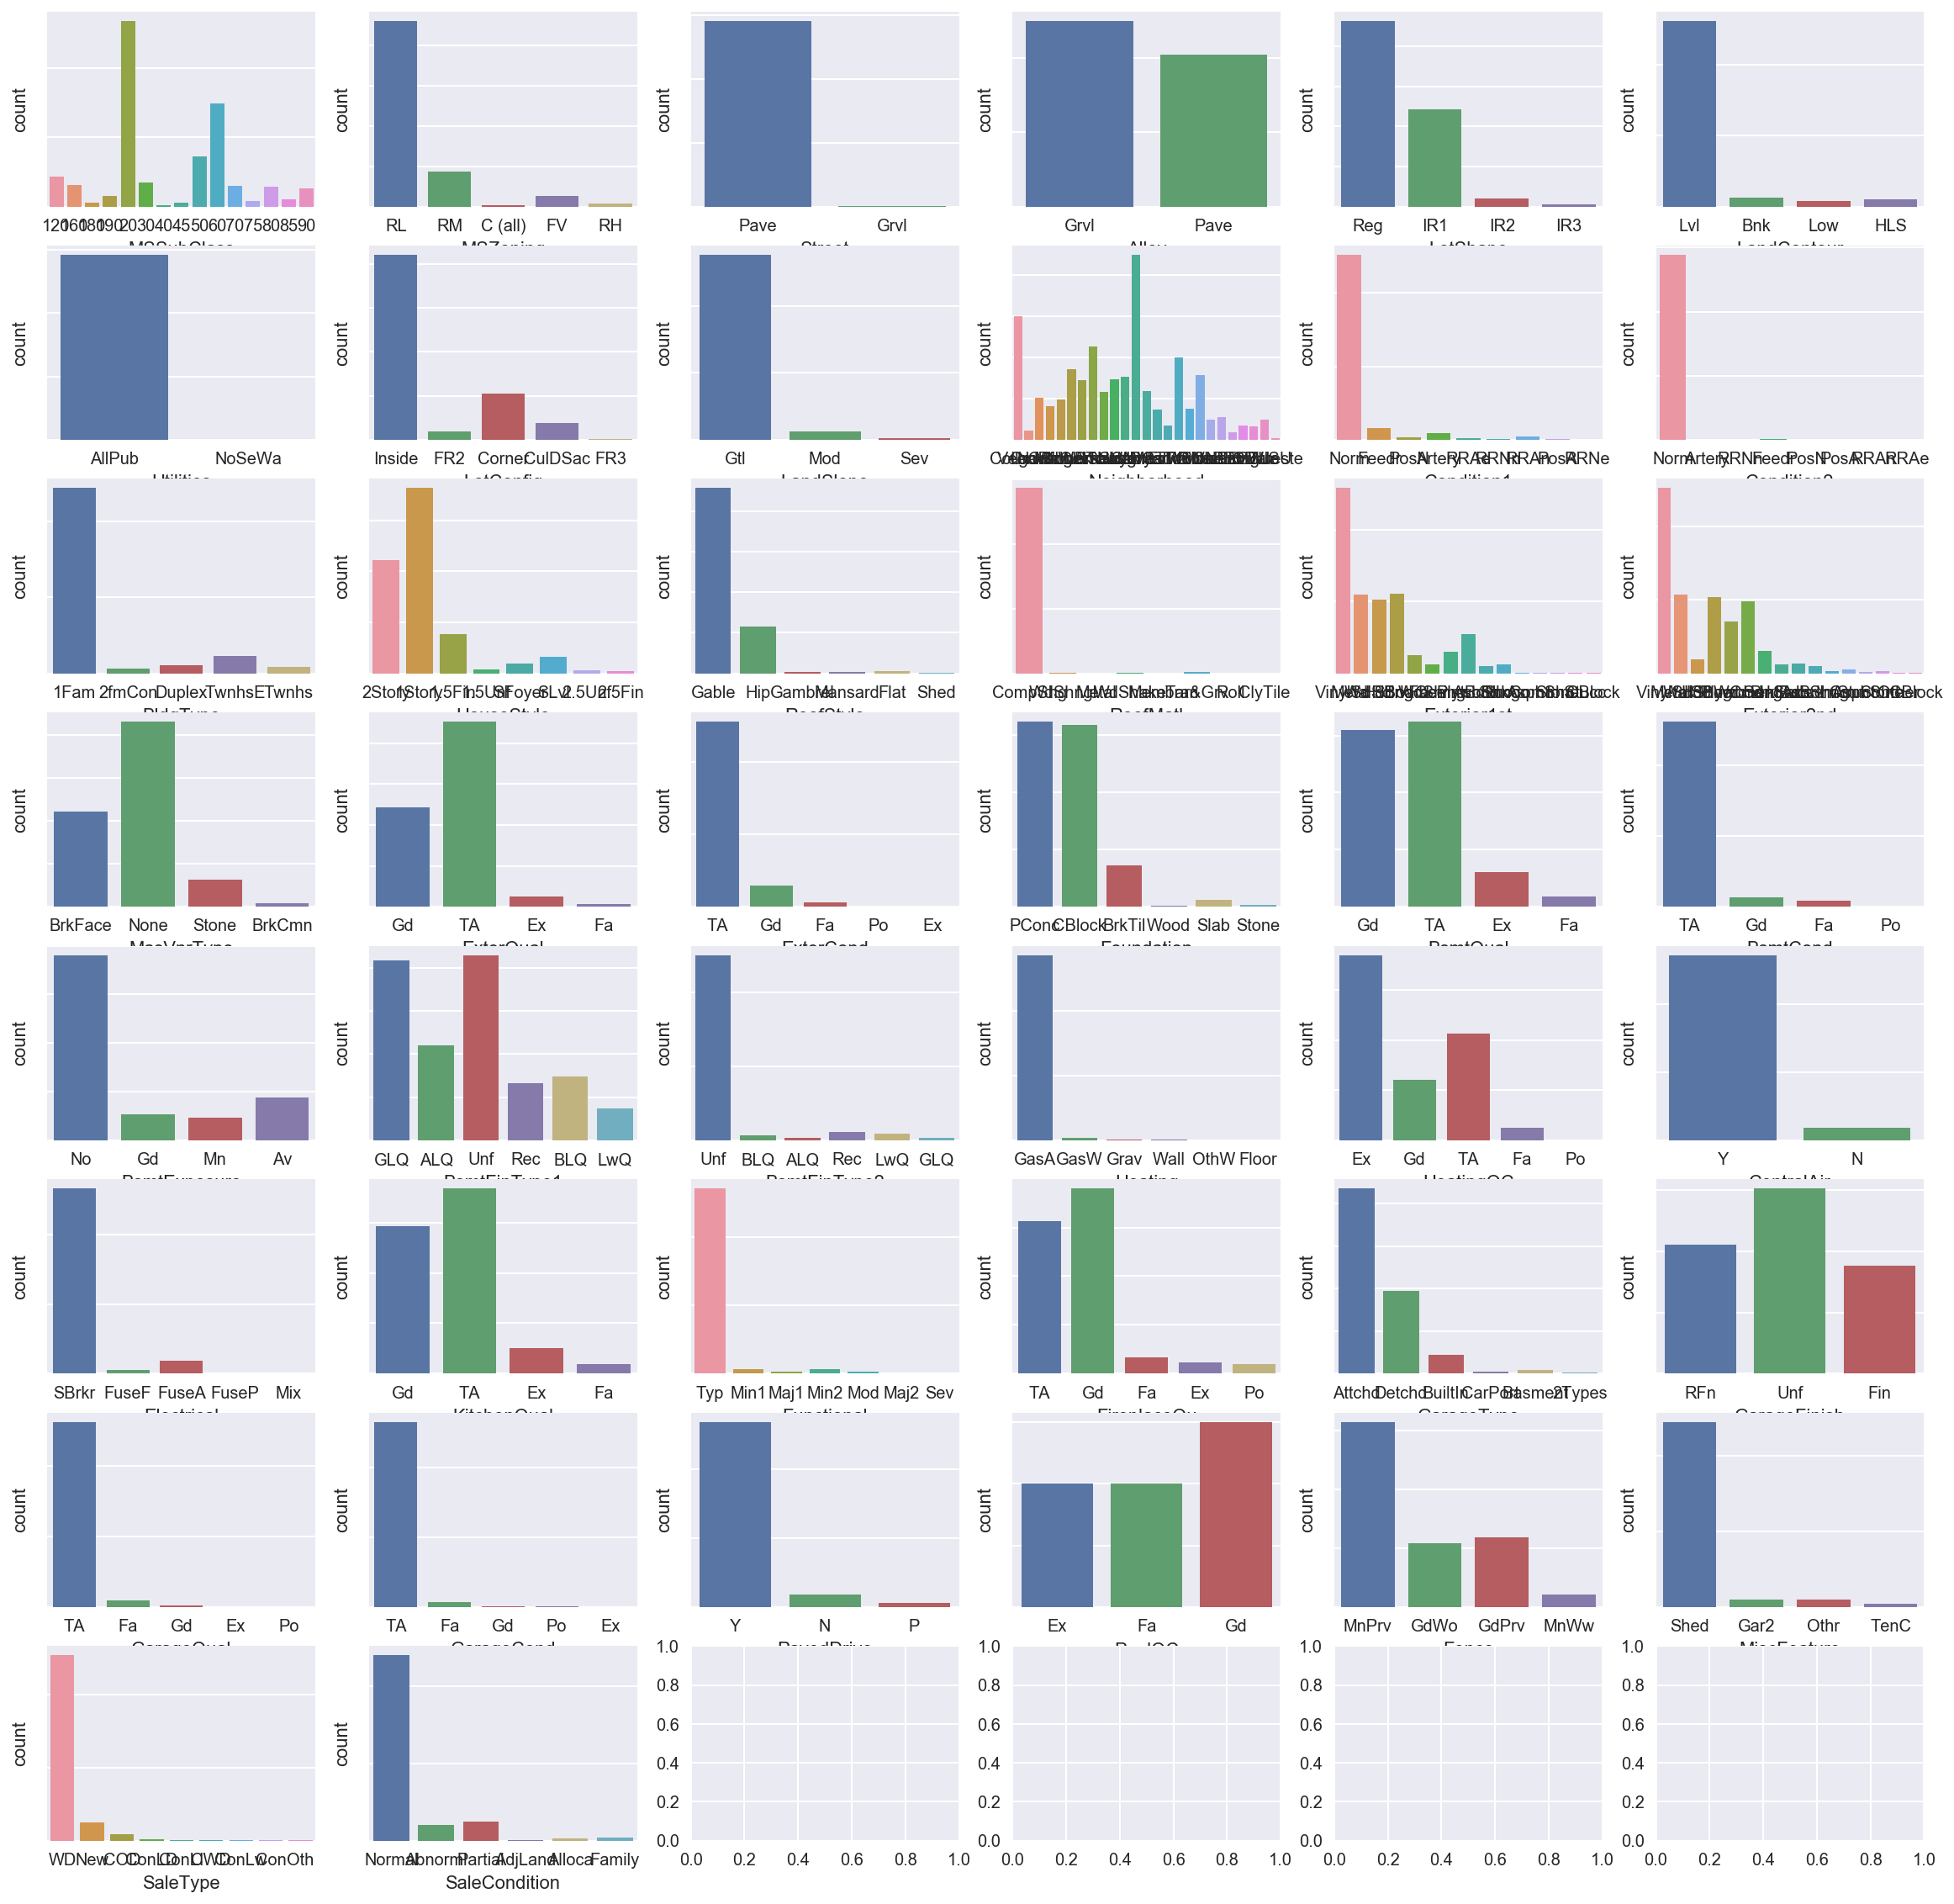

In [10]:
fig, ax = plt.subplots(8,6, figsize = (20,20))

for idx, n in enumerate(categorical_features):
    
    sns.countplot(x=n, data=train, ax = ax[idx//6, idx % 6])
    ax[idx//6, idx % 6].set(yticklabels=[])
    
    continue   

### 2-3 Relationship between SalePrice and variables

#### 2-3-1 Area

In [11]:
# Make df_train set to check 2ndFloor and Basement
df_train = train.copy()
df_train["2ndFloor"] = "2ndFloor"
df_train["2ndFloor"].loc[df_train["2ndFlrSF"]==0] = "No 2ndFloor"
df_train["Basement"] = "Basement"
df_train["Basement"].loc[df_train["TotalBsmtSF"]==0] = "No Basement"

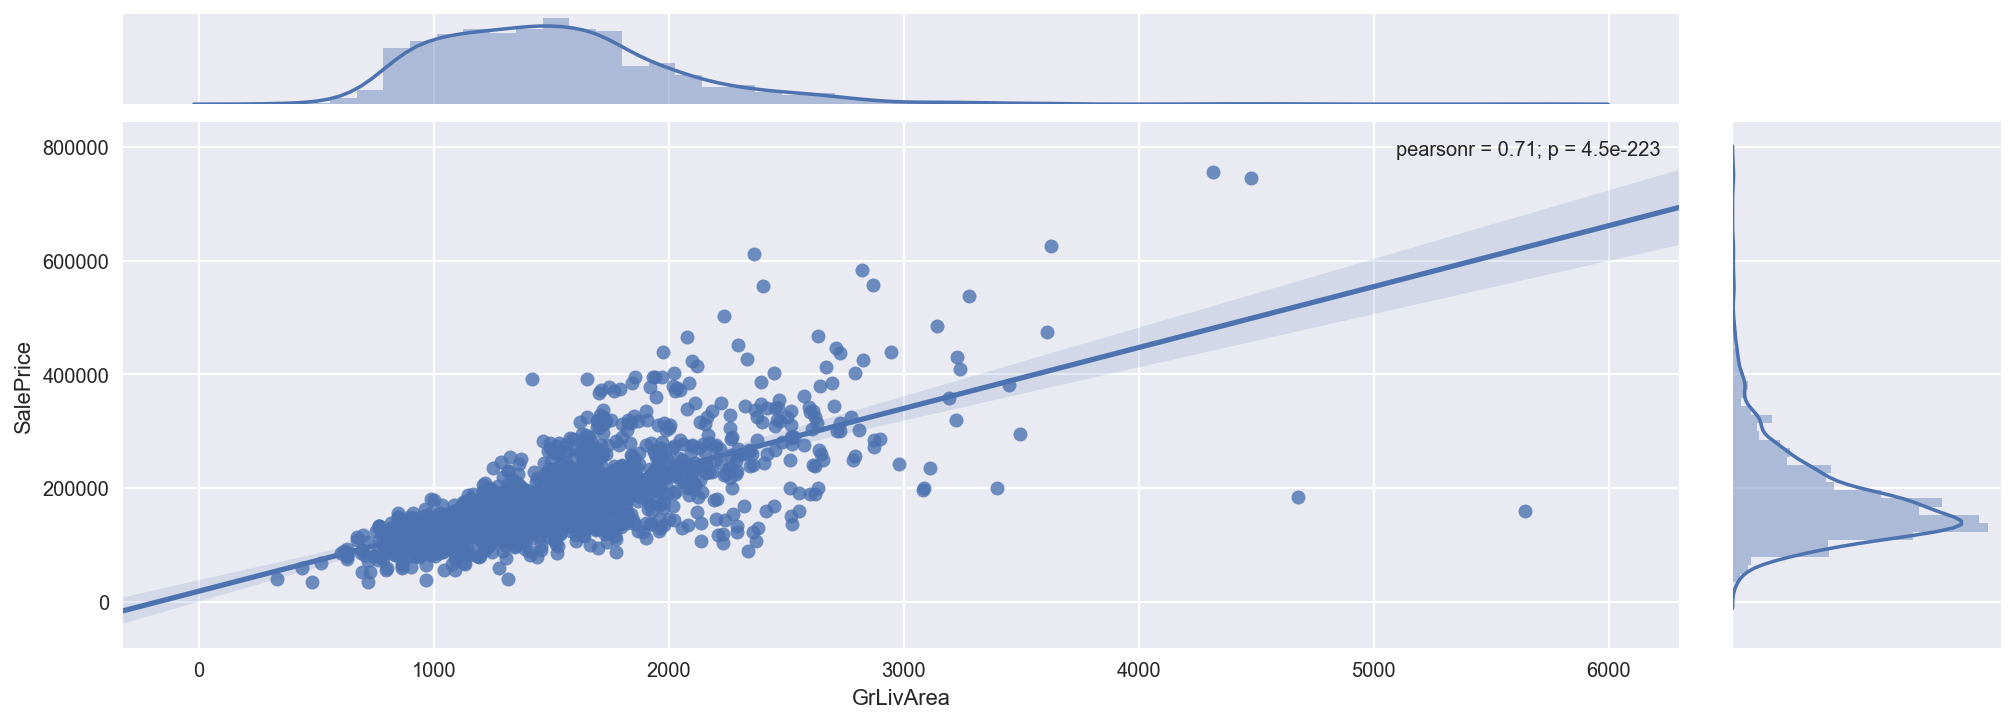

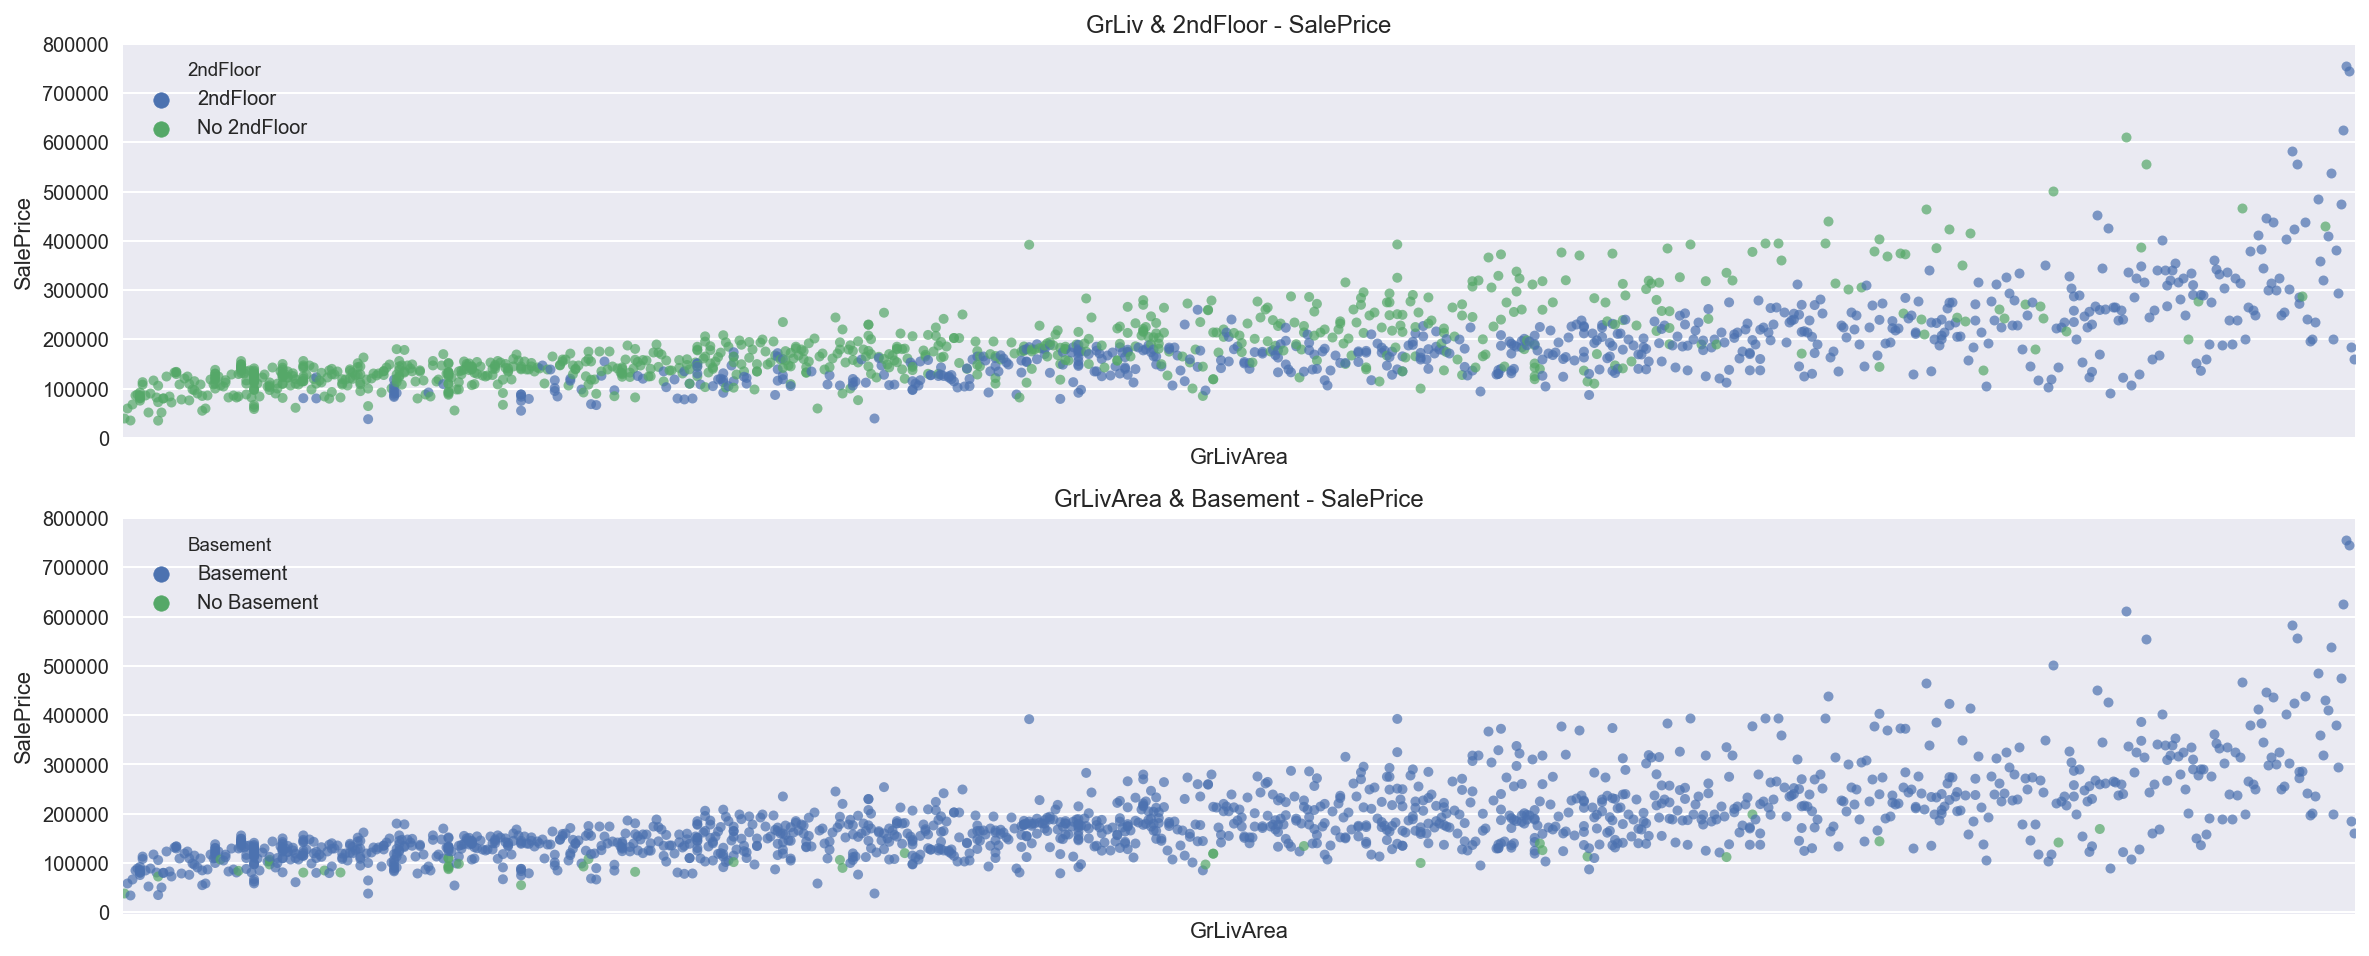

In [12]:
# Joint plot GrLivArea/saleprice
grid = sns.jointplot(x = "GrLivArea", y = "SalePrice", data=train, kind="reg")
grid.fig.set_size_inches(15,5)

# Strip plot GrLivArea/2ndFloor/saleprice
plt.figure(figsize = (20,8))
plt.subplot(211)
g = sns.stripplot(x = "GrLivArea", y = 'SalePrice', hue = "2ndFloor", data = df_train, alpha = 0.7)
g.set_xlabel('GrLivArea')
g.set_ylabel('SalePrice')
g.set_xticks([])
g.set_title('GrLiv & 2ndFloor - SalePrice')

# Strip plot GrLivArea/Basement/saleprice
plt.subplot(212)
b = sns.stripplot( x = "GrLivArea", y = 'SalePrice', hue = "Basement", data = df_train, alpha = 0.7)
b.set_xlabel('GrLivArea')
b.set_ylabel('SalePrice')
b.set_title('GrLivArea & Basement - SalePrice')
b.set_xticks([])

plt.show()

#### Comments : 
1.GrLivArea is a linear relationship to house values and is heterogeneous.

2.If the house price is above $ 200,000, there are more houses on the second floor and a few houses without basement

#### 2-3-2 Overall

Text(0.5,1,'OverallCond - SalePrice')

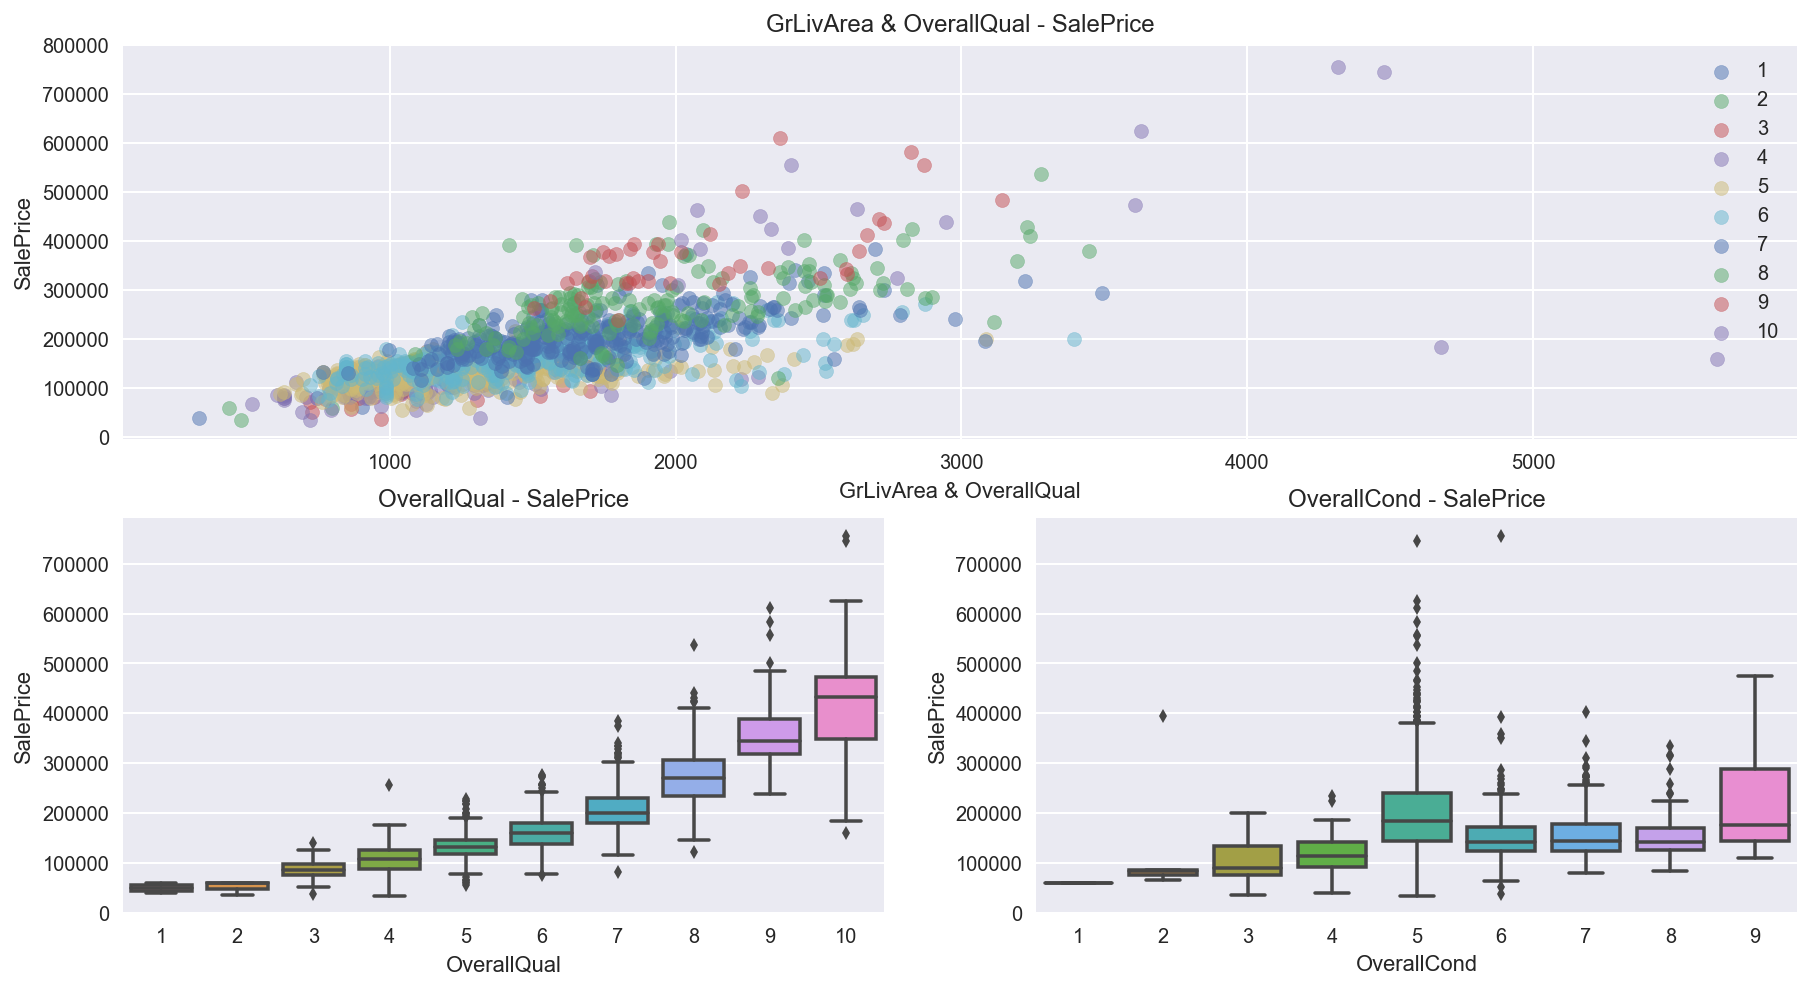

In [13]:
# Graph for GrLivArea & OverallQual - SalePrice
plt.figure(figsize=(15,8))
ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
for qual in range(1,11):
    index = train.OverallQual == qual
    ax1.scatter(train.GrLivArea.loc[index], train.SalePrice.loc[index], data=train, label= qual, alpha =0.5)
ax1.legend(loc = 0)
ax1.set_title("GrLivArea & OverallQual - SalePrice")
ax1.set_xlabel('GrLivArea & OverallQual')
ax1.set_ylabel('SalePrice')

# Graph for OverallQual - SalePrice
ax2 = plt.subplot2grid((2,2), (1,0))
sns.boxplot(x = "OverallQual", y = "SalePrice", data=train, ax= ax2)
ax2.set_title('OverallQual - SalePrice')

# Graph for OverallCond - SalePrice
ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = "OverallCond", y = "SalePrice", data=train, ax= ax3)
ax3.set_title('OverallCond - SalePrice')

#### Comments :

1. 'OverallQual' seem to be related with 'SalePrice' and the box plot shows how sales prices increase with the overall quality. however, the 'OverallCond' seem to be not related.

#### 2-3-3 Garage

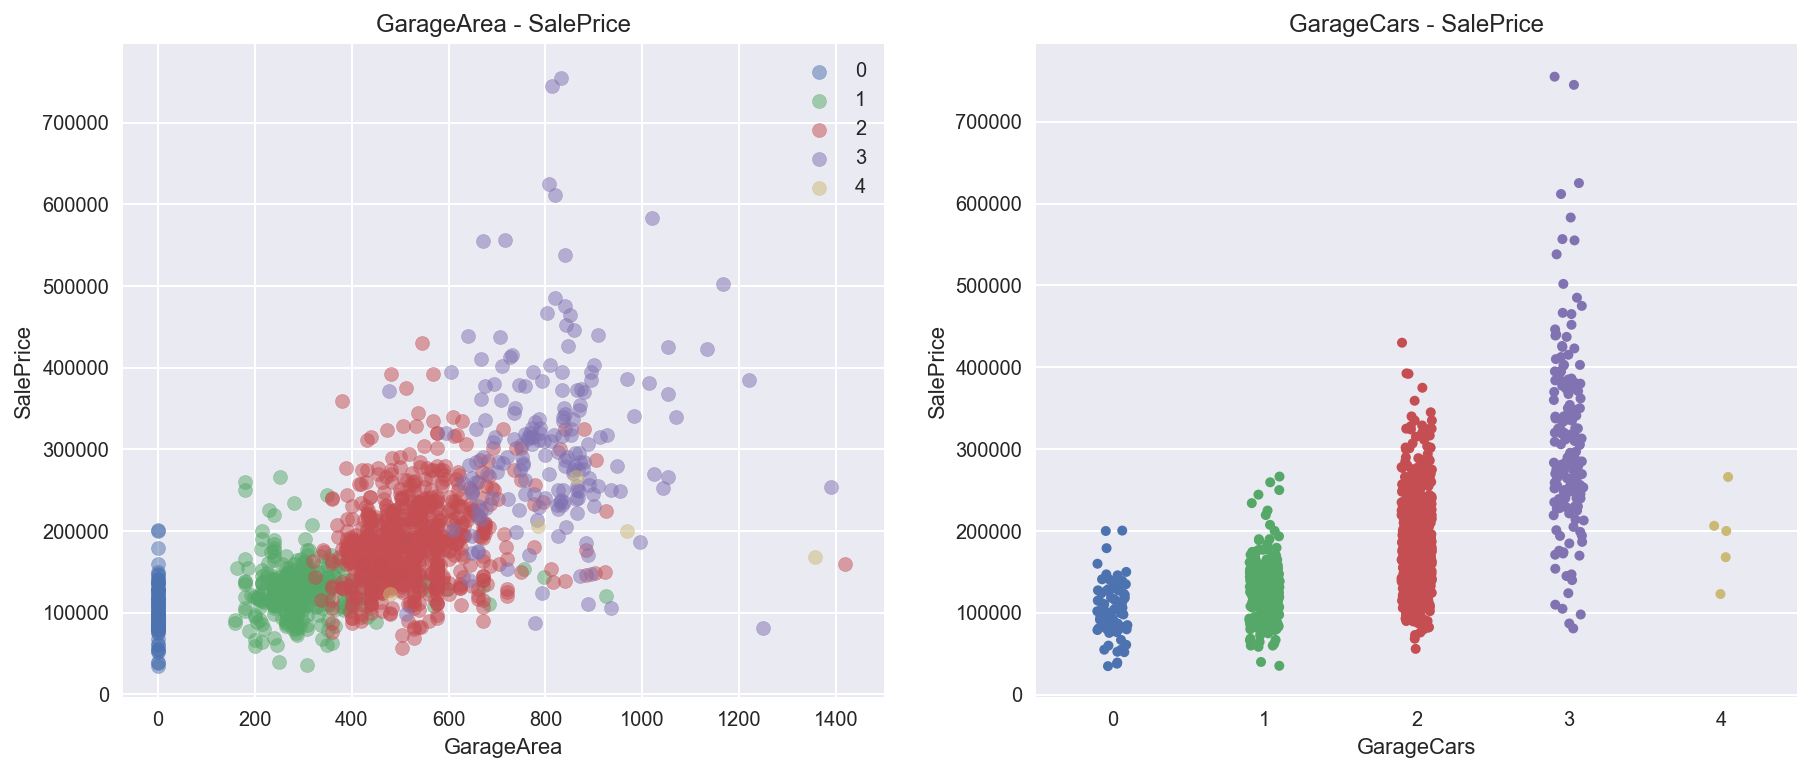

In [14]:
# Graph for GarageArea & GarageCars - SalePrice
plt.figure(figsize=(15,6))

ax1 = plt.subplot(1,2,1)
for car in range(0,5):
    index = train.GarageCars == car
    ax1.scatter(x = train.GarageArea.loc[index], y = train.SalePrice.loc[index], data=train, label=car, alpha='0.5')

# Graph for GarageArea 
ax1.legend()
ax1.set_title('GarageArea - SalePrice')
ax1.set_xlabel('GarageArea')
ax1.set_ylabel('SalePrice')

# Graph for GarageCars
ax2 = plt.subplot(1,2,2)
sns.stripplot(x = "GarageCars", y = "SalePrice", data=train,ax=ax2, jitter=True)
ax2.set_title('GarageCars - SalePrice')
ax2.legend()

plt.show()

#### Comments:
1. The wider the GarageArea and the larger the number of cars (GarageCars), it can be seen that the higher the house price

#### 2-3-4 Neighborhood

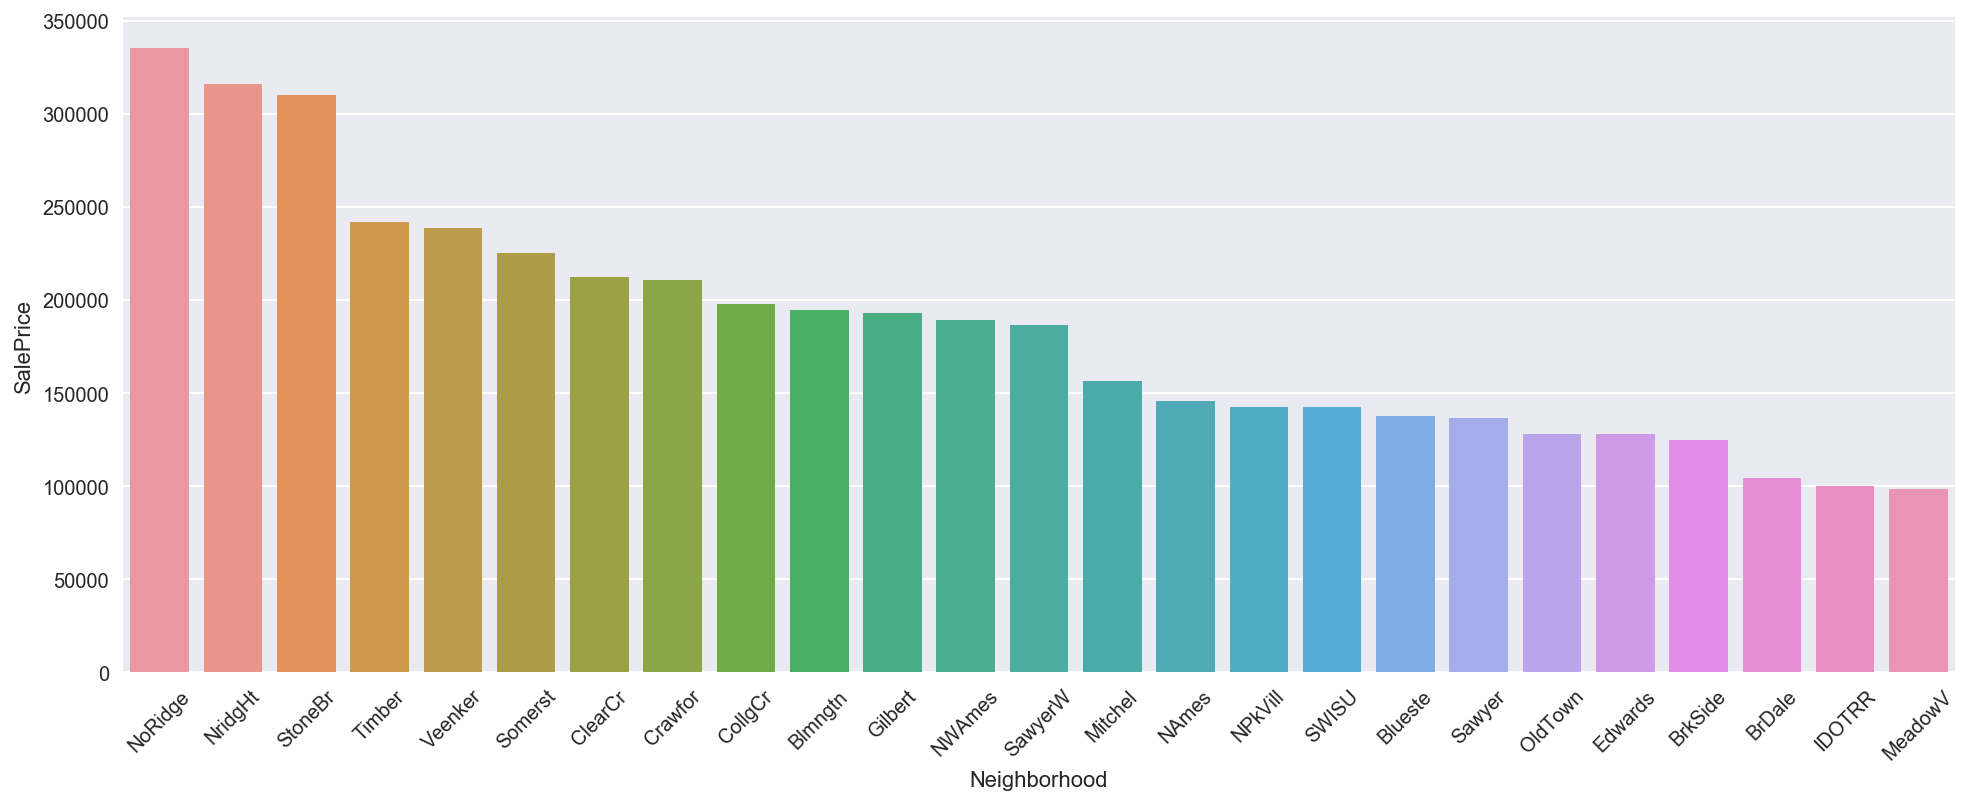

In [15]:
# Neighborhood variables are grouped by neighbors and then aggregated by average
Neighbor = train.pivot_table(index="Neighborhood",values="SalePrice", aggfunc='mean').sort_values(by = ["SalePrice"], ascending = False)
Neighbor = Neighbor.reset_index()

# The bar graph displays the aggregated data in the order of the highest to lowest price
g = sns.factorplot(x = "Neighborhood", y="SalePrice", data=Neighbor, size =8, kind="bar")
g.set_xticklabels(rotation=45)
g.fig.set_size_inches(15,5)
plt.show()

In [16]:
# High_price_neighbor is the house value of more than 250,000, Middle_price_neighbor is the neighbor of 250,000 ~ 150,000, and Low_price_neighbor is the remaining neighbor
def neighbor_level(x):
    High_price_neighbor = ['NoRidge','NridgHt','StoneBr'] 
    Middle_price_neighbor = ['Timber','Somerst','Veenker','ClearCr','Crawfor','NWAmes', 'Gilbert','Blmngtn', 'SWISU','Mitchel','CollgCr']
    Low_price_neighbor = ['IDOTRR','Blueste', 'Sawyer','NAmes', 'BrDale', 'OldTown','MeadowV', 'NPkVill','BrkSide','Edwards']
    
    if str(x) in High_price_neighbor:
        return "high"
    elif str(x) in Middle_price_neighbor:
        return "middle"
    elif str(x) in Low_price_neighbor:
        return "low"
    
df_train["neighbor_level"] = df_train["Neighborhood"].apply(neighbor_level)

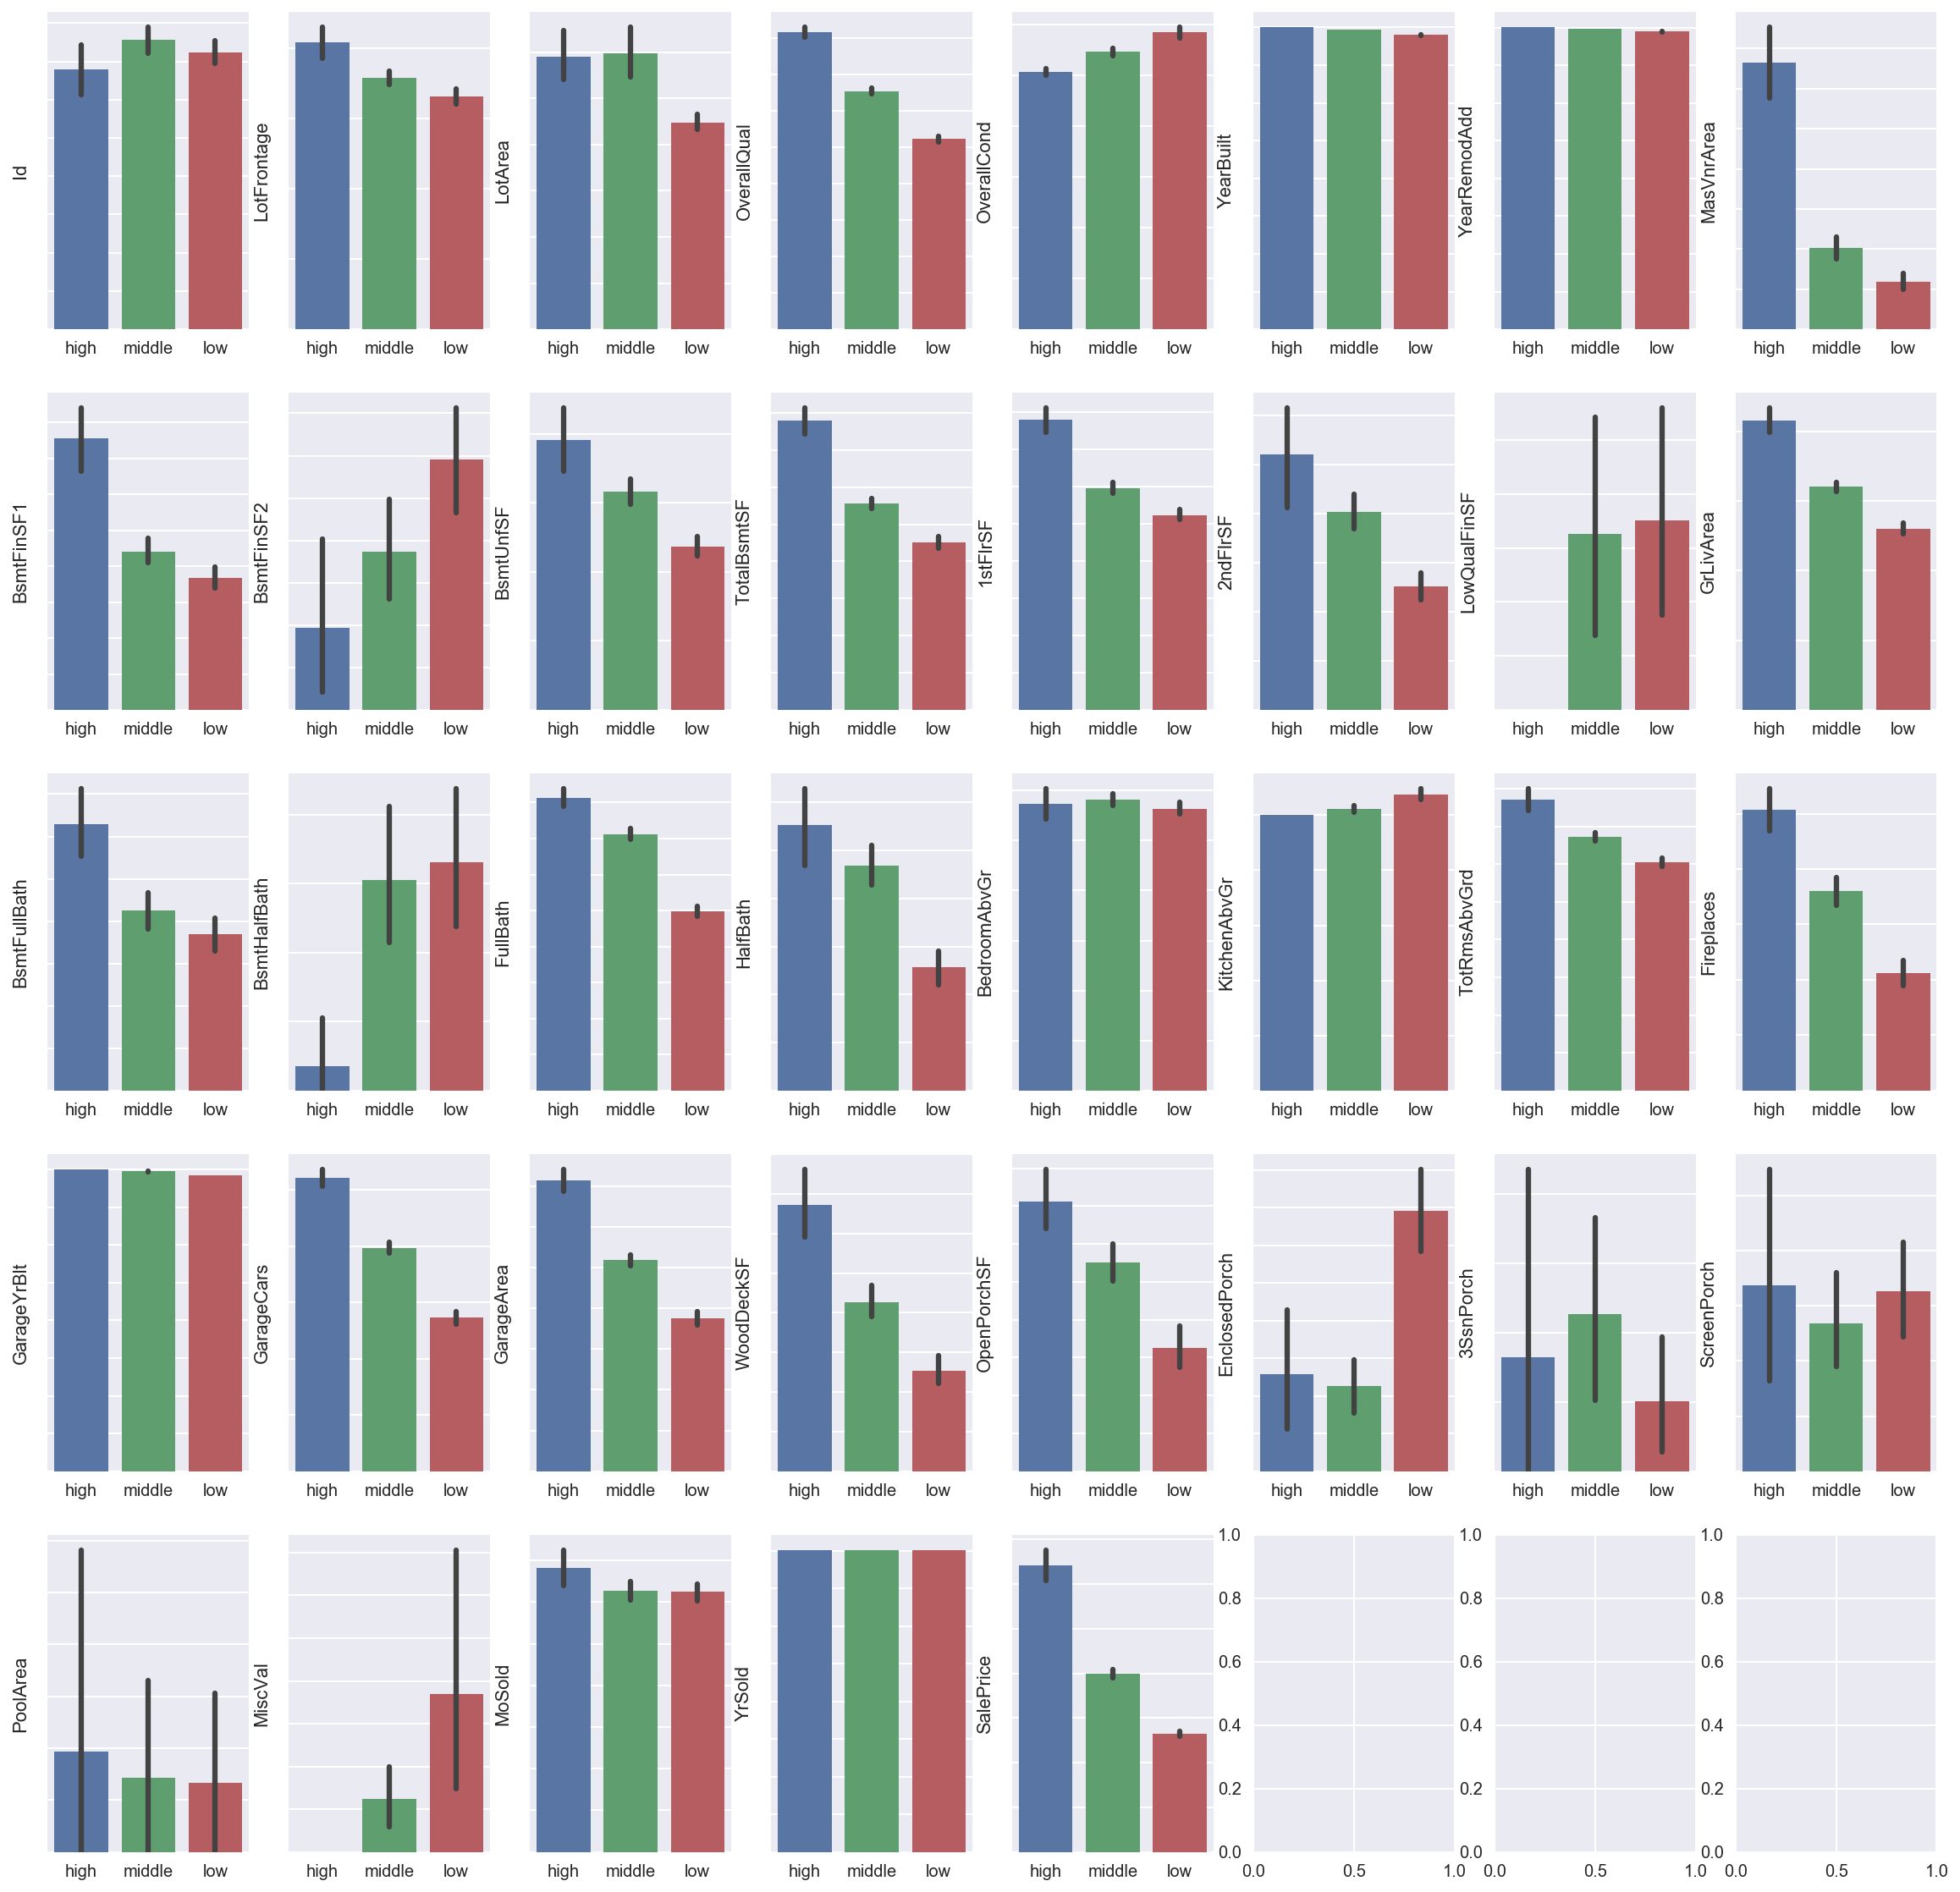

In [17]:
fig, ax = plt.subplots(5,8, figsize = (20,20))

for idx, n in enumerate(numerical_features):

    sns.barplot(x="neighbor_level", y= n, data=df_train, ax = ax[idx//8,idx%8], order=['high', 'middle', 'low'])
    ax[idx//8, idx % 8].set(yticklabels=[])
    ax[idx//8, idx % 8].set_xlabel("")
    ax[idx//8, idx % 8].set_ylabel(n)
    continue  

#### Comments:
1. High group's Overall quality (overall quality), GrLivArea (living room size), and GargeArea (garage width) are high on the average, which is an important factor in predicting house prices

#### 2-3-4 Year

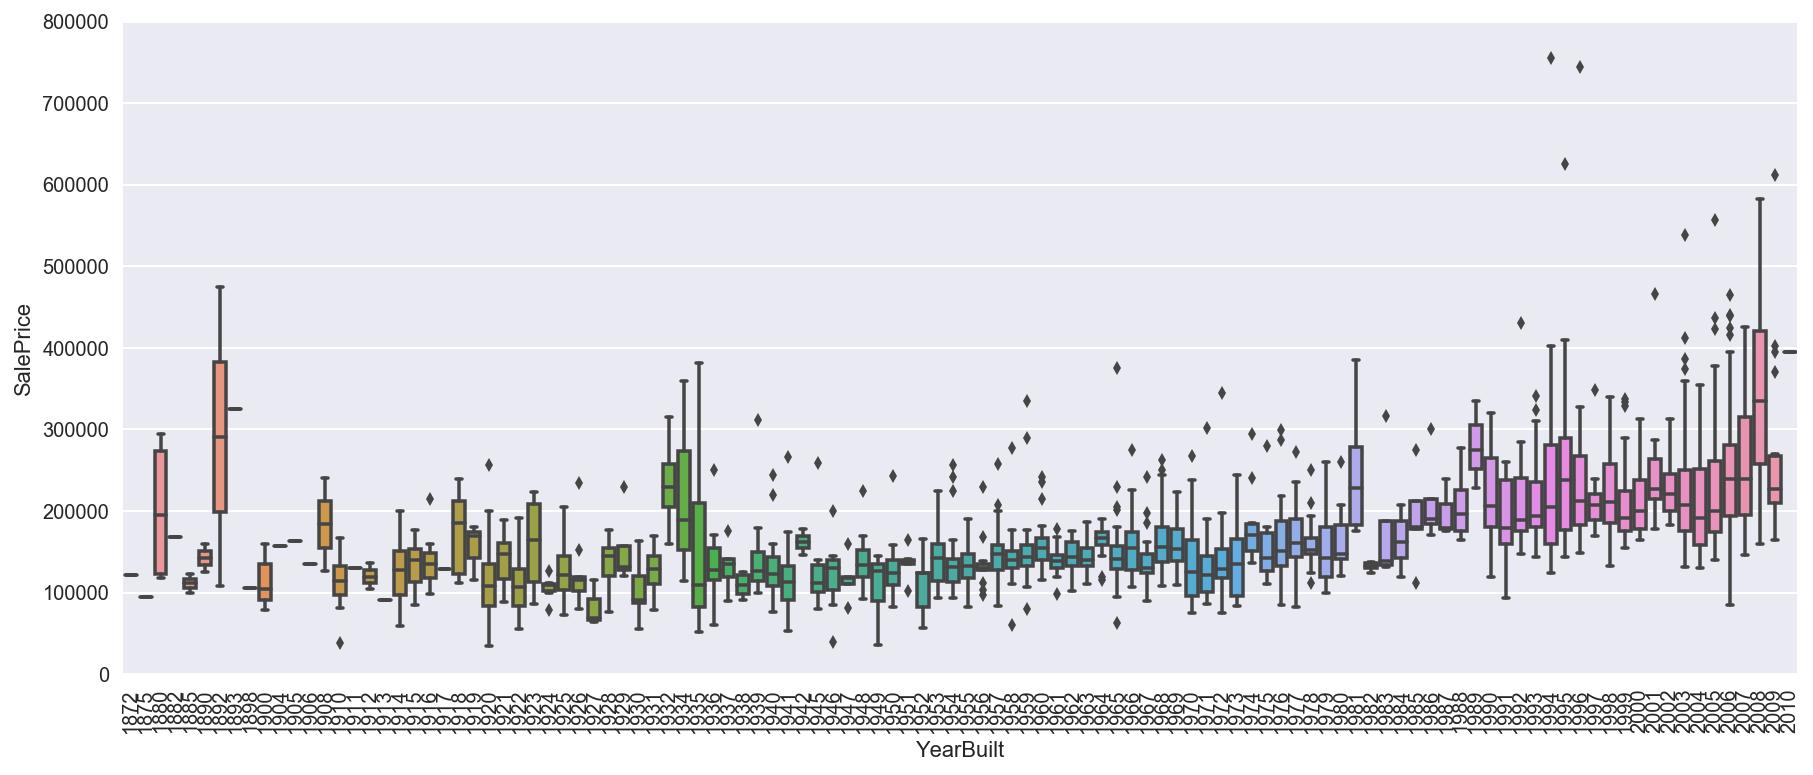

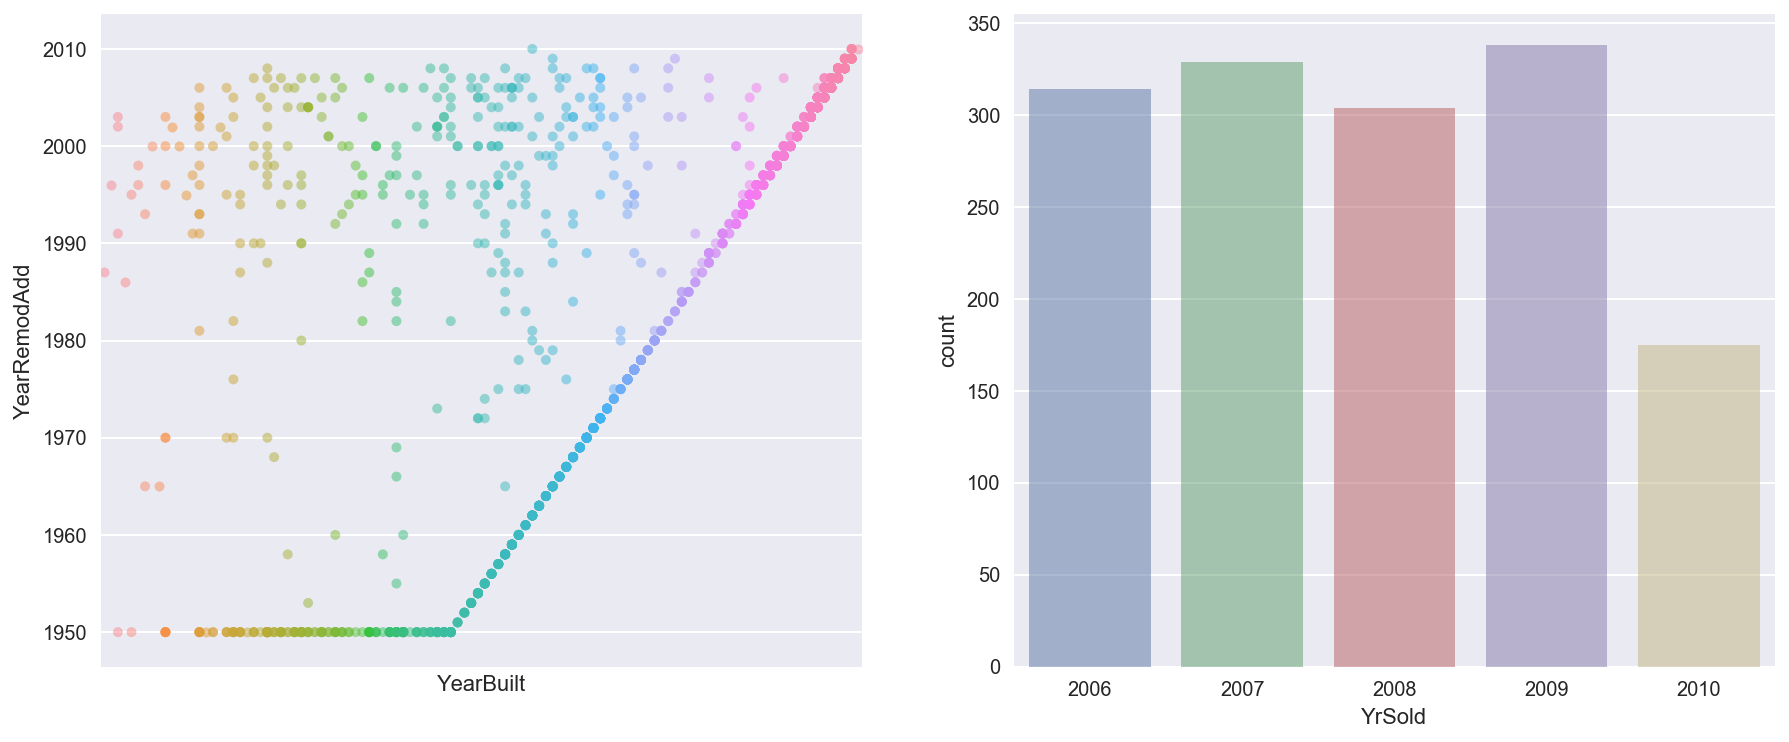

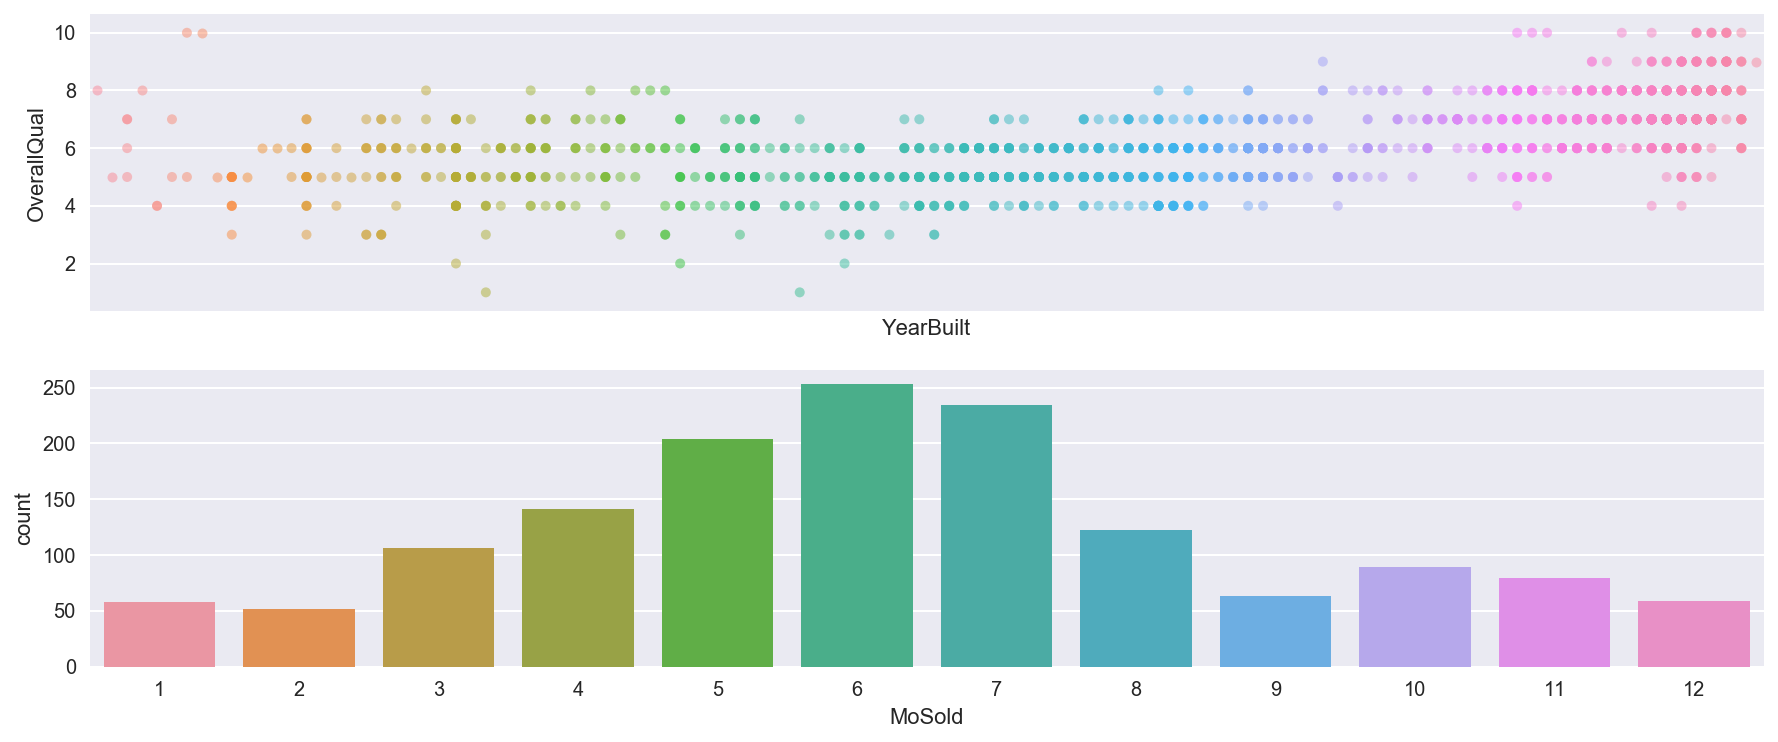

In [18]:
# Correlation between YearBuilt and SalePrice
# Boxplot YearBuilt / SalePrice
plt.figure(figsize=(15,6))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

# Stripplot YearRemodAdd / YearBuilt
plt.figure(figsize=(15,6))
ax2 = plt.subplot(1,2,1)
sns.stripplot(x = train['YearBuilt'], y = train['YearRemodAdd'], alpha = 0.5,ax=ax2)
ax2.set_xticks([])
plt.xlabel('YearBuilt')
plt.ylabel('YearRemodAdd')

# Countplot YrSold 
ax3 = plt.subplot(1,2,2)
sns.countplot(x = train['YrSold'], alpha = 0.5, ax=ax3)
plt.show()

# Stripplot YearBuilt / OverallQual
plt.figure(figsize=(15,6))
ax4 = plt.subplot2grid((2,2), (0,0), colspan = 2)
sns.stripplot(x = train['YearBuilt'], y = train['OverallQual'], alpha = 0.5,ax=ax4)

ax4.set_xticks([])
plt.xlabel('YearBuilt')
plt.ylabel('OverallQual')

# Countplot MoSold  
ax5 = plt.subplot2grid((2,2), (1,0), colspan = 2)
sns.countplot(x = "MoSold", data=train, ax = ax5)
plt.show()

#### Comments :

1. The price of recently built house is high.
2. Houses that have not been remodeled are recorded in the same year as the year they were built.
3. Remodeling took place after 1950 and most of the old houses were remodeled in 1950.
4. The year of the sale is from 2006 to 2010, with the largest sale in 2009.
5. The most active trading takes place in May, June, and July.

### 2-3-5 Fireplaces

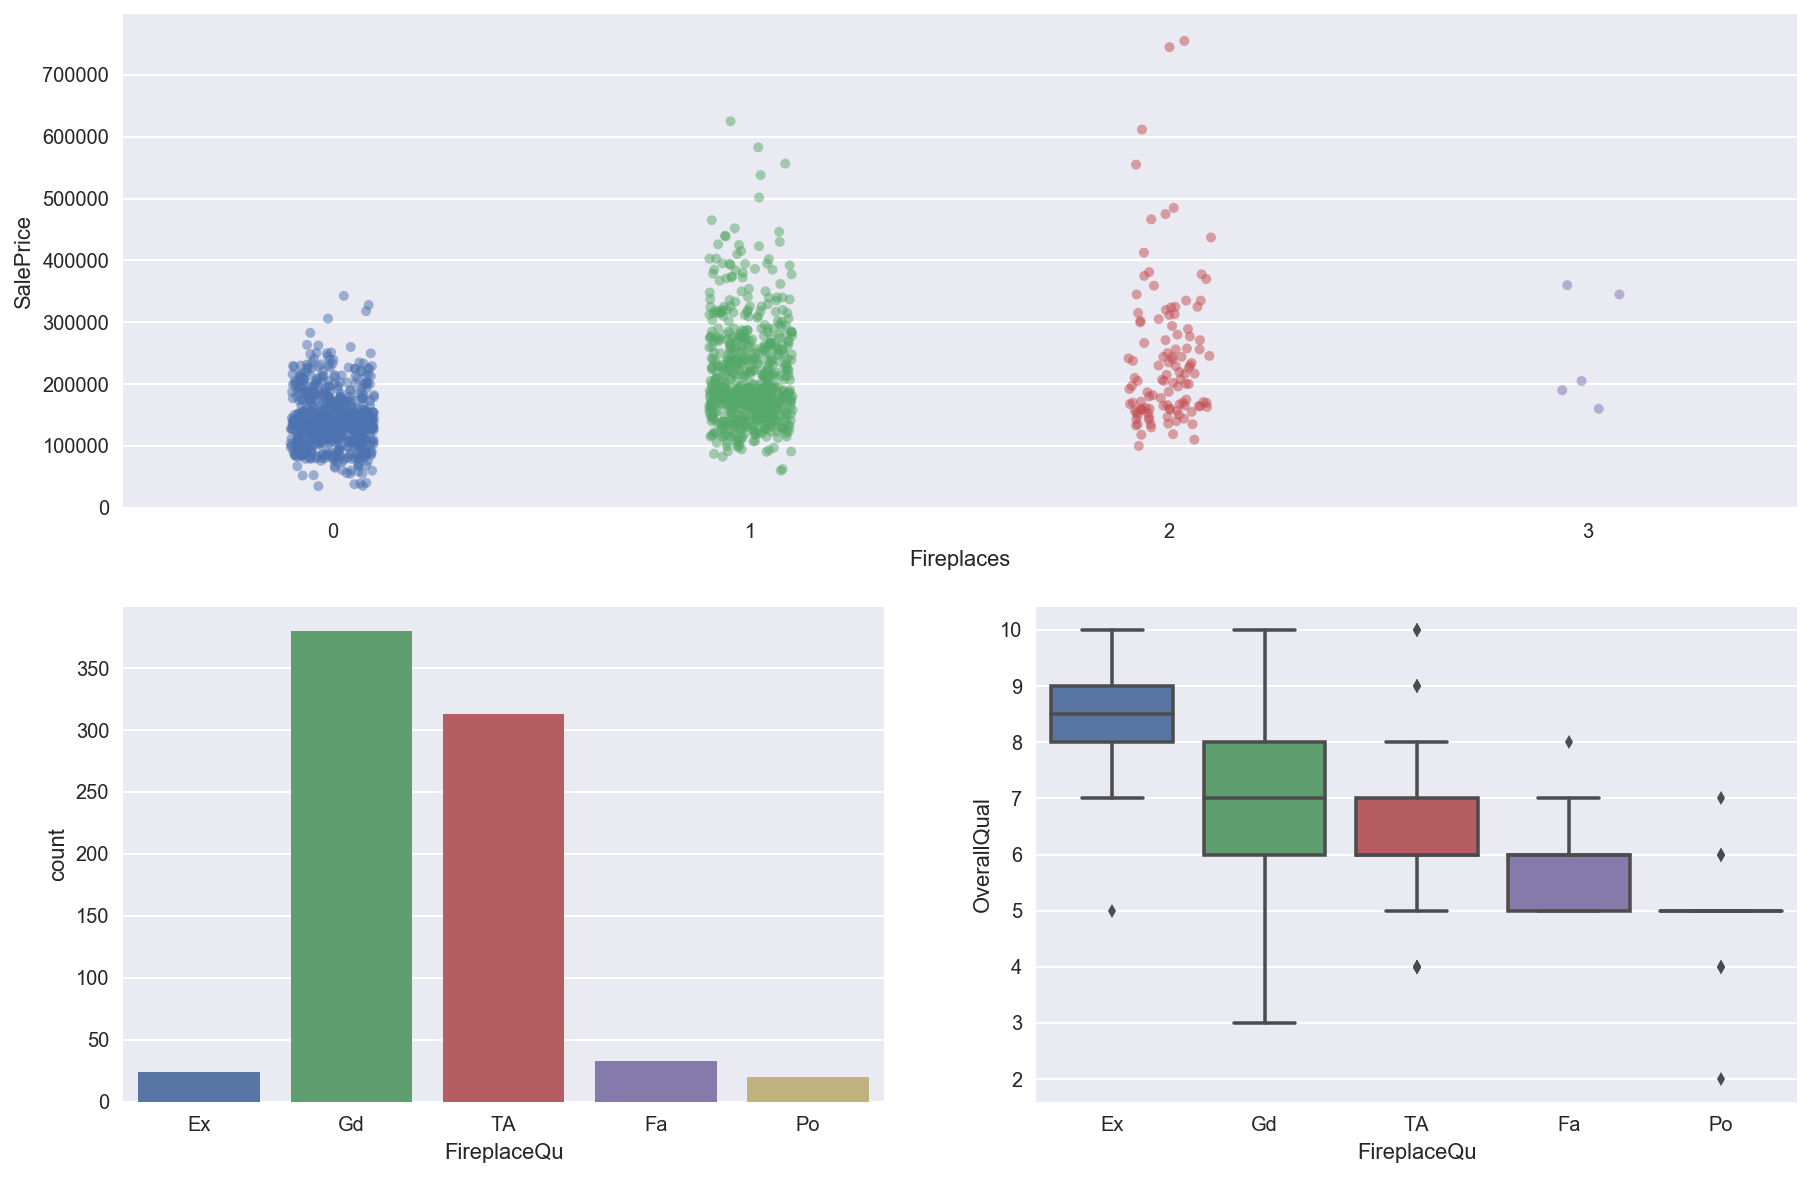

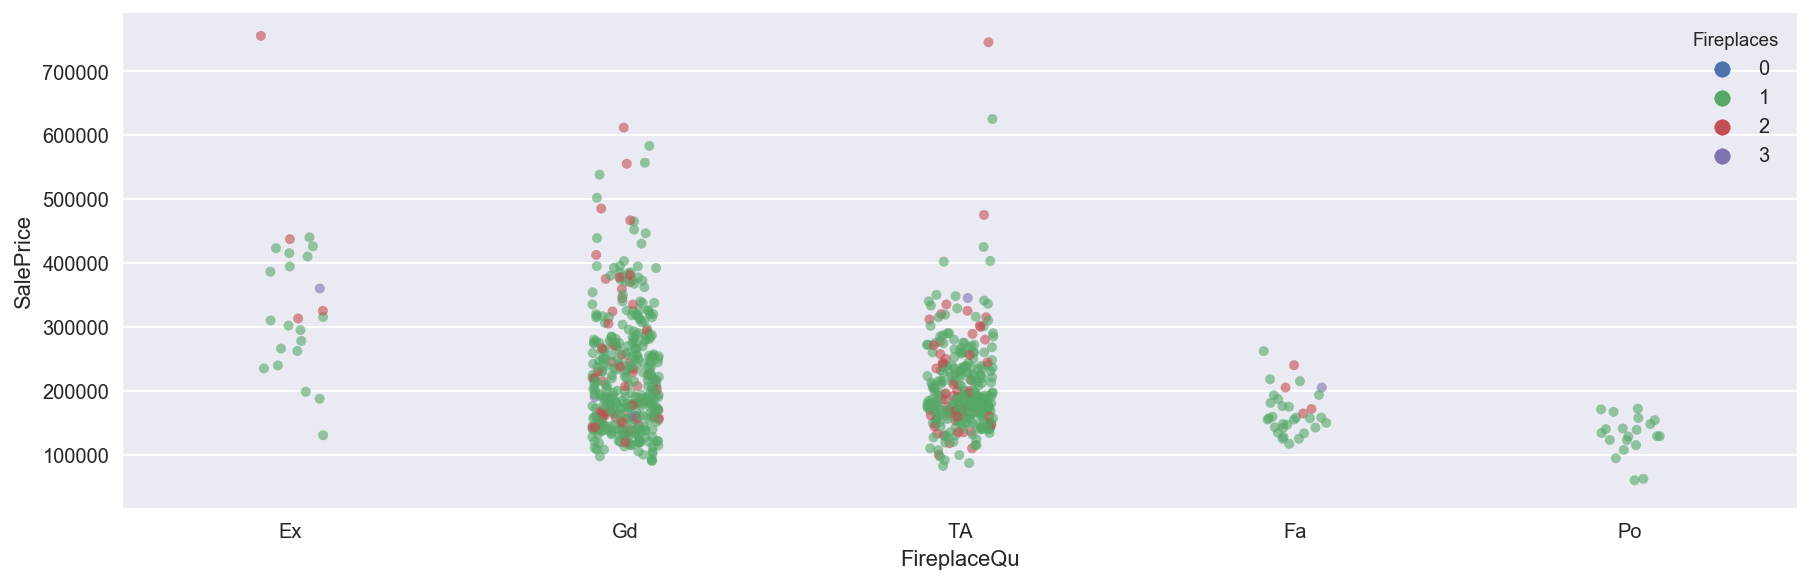

In [19]:
# Stripplot Fireplaces / SalePrice
plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
sns.stripplot(x = train['Fireplaces'], y = train['SalePrice'], alpha = 0.5, jitter = True, ax=ax1)

# Countplot FireplaceQu 
ax2 = plt.subplot2grid((2,2), (1,0))
sns.countplot(x = "FireplaceQu", data=train, ax = ax2, order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'])

# Boxplot FireplaceQu / OverallQual
ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = 'FireplaceQu', y = 'OverallQual', data = train, order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], ax=ax3)
plt.show()

# Stripplot FireplaceQu / Fireplaces / SalePrice
plt.figure(figsize=(15,10))
ax4 = plt.subplot(2,1,1)
sns.stripplot(x='FireplaceQu', y='SalePrice', hue='Fireplaces', data=train, jitter=True, alpha=0.6,order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], ax=ax4)

plt.show()

#### Comments:

1. There is a price difference between a house with zero FirePlaces and a house with one FirePlaces.
2. FireplaceQu and OverallQual are closely related.
3. The lower the FireplaceQu, the lower the SalePrice

### 2-3-6 Basement Bath

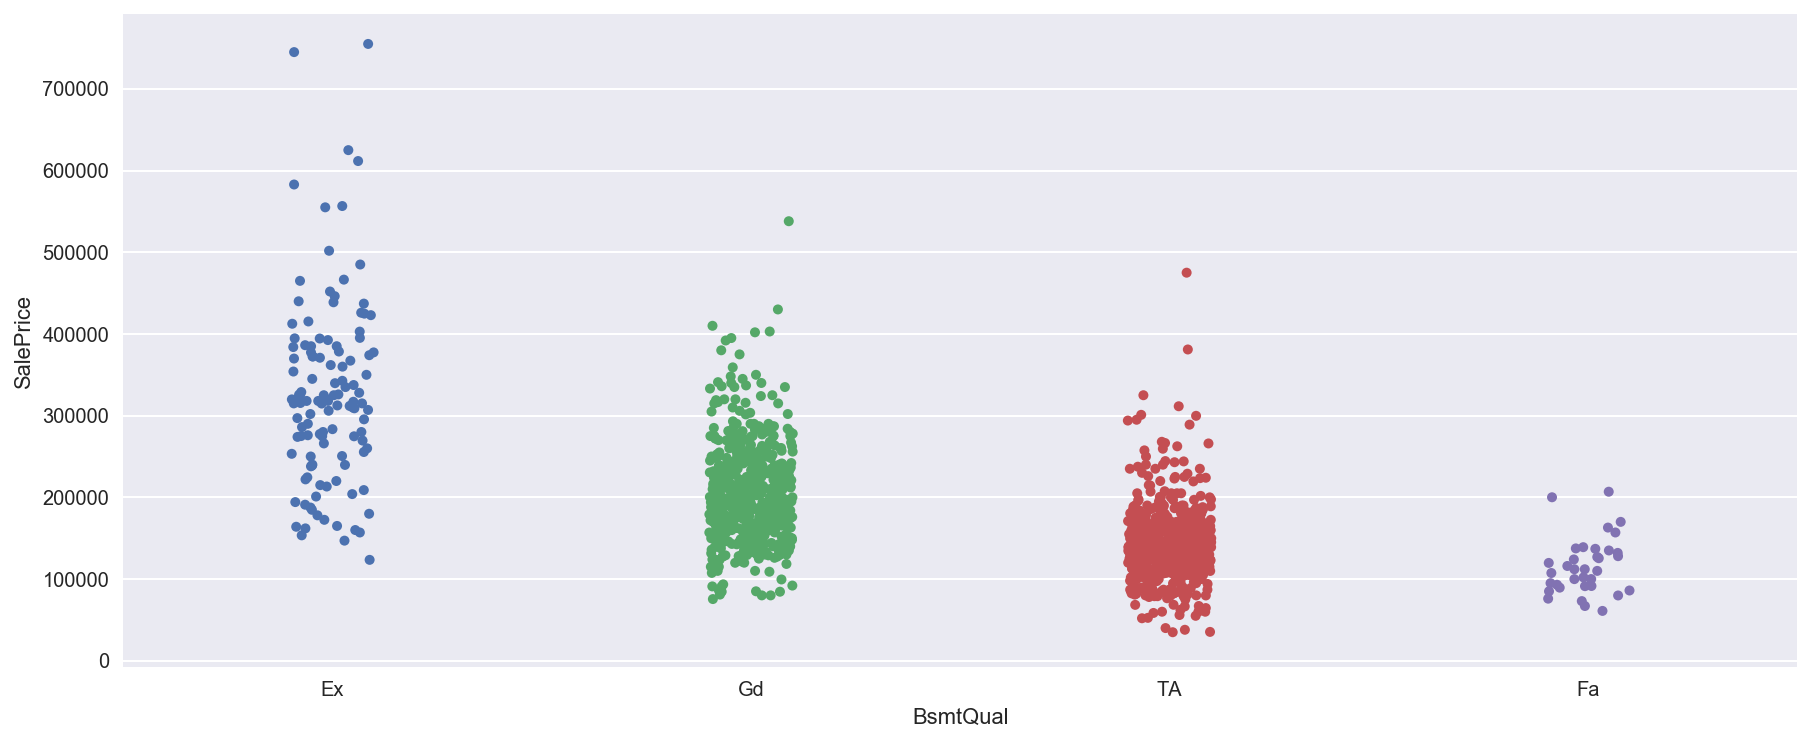

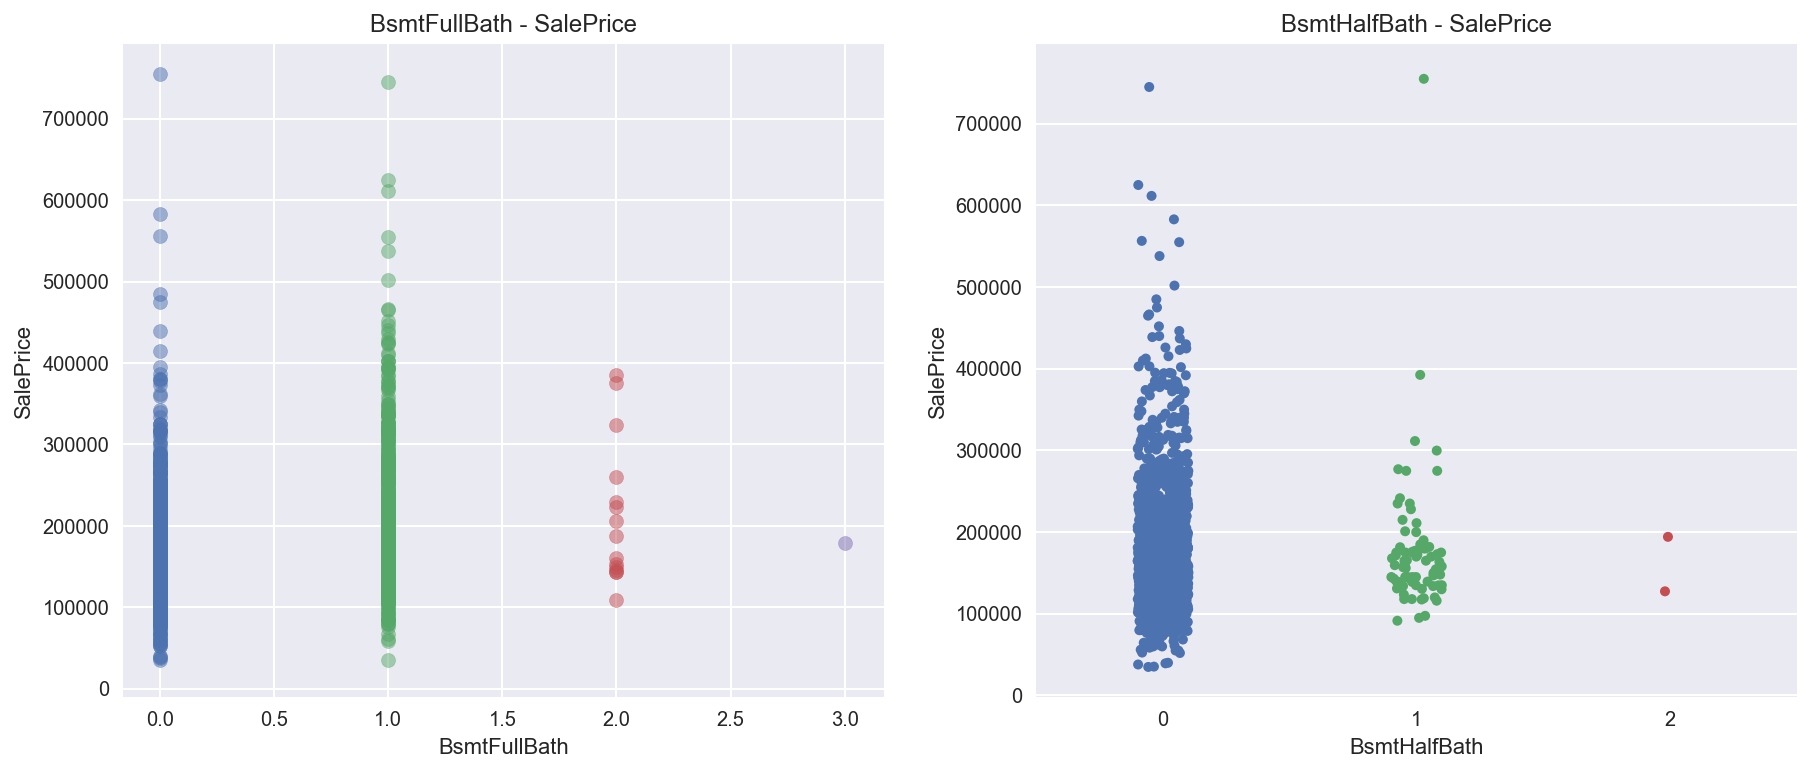

In [20]:
# Stripplot BsmtQual / SalePrice
plt.figure(figsize=(15,6))
sns.stripplot(x = "BsmtQual", y = "SalePrice", data=train, jitter=True,\
             order = ['Ex', 'Gd', 'TA', 'Fa'])

plt.figure(figsize=(15,6))

# Scatterplot BsmtFullBath
ax1 = plt.subplot(1,2,1)
for BSMT in range(0,5):
    index = train.BsmtFullBath == BSMT
    ax1.scatter(x = train.BsmtFullBath.loc[index], y = train.SalePrice.loc[index], data=train, label=BSMT, alpha='0.5')

# ax1.legend()
ax1.set_title('BsmtFullBath - SalePrice')
ax1.set_xlabel('BsmtFullBath')
ax1.set_ylabel('SalePrice')

# Stripplot BsmtHalfBath / SalePrice
ax2 = plt.subplot(1,2,2)
sns.stripplot(x = "BsmtHalfBath", y = "SalePrice", data=train,ax=ax2, jitter=True)
ax2.set_title('BsmtHalfBath - SalePrice')


plt.show()

#### Comment :
1. The higher the quality of the bathroom, the higher the house price.
2. In the case of HalfBath, the more the house price goes down

### 2-3-7 Room

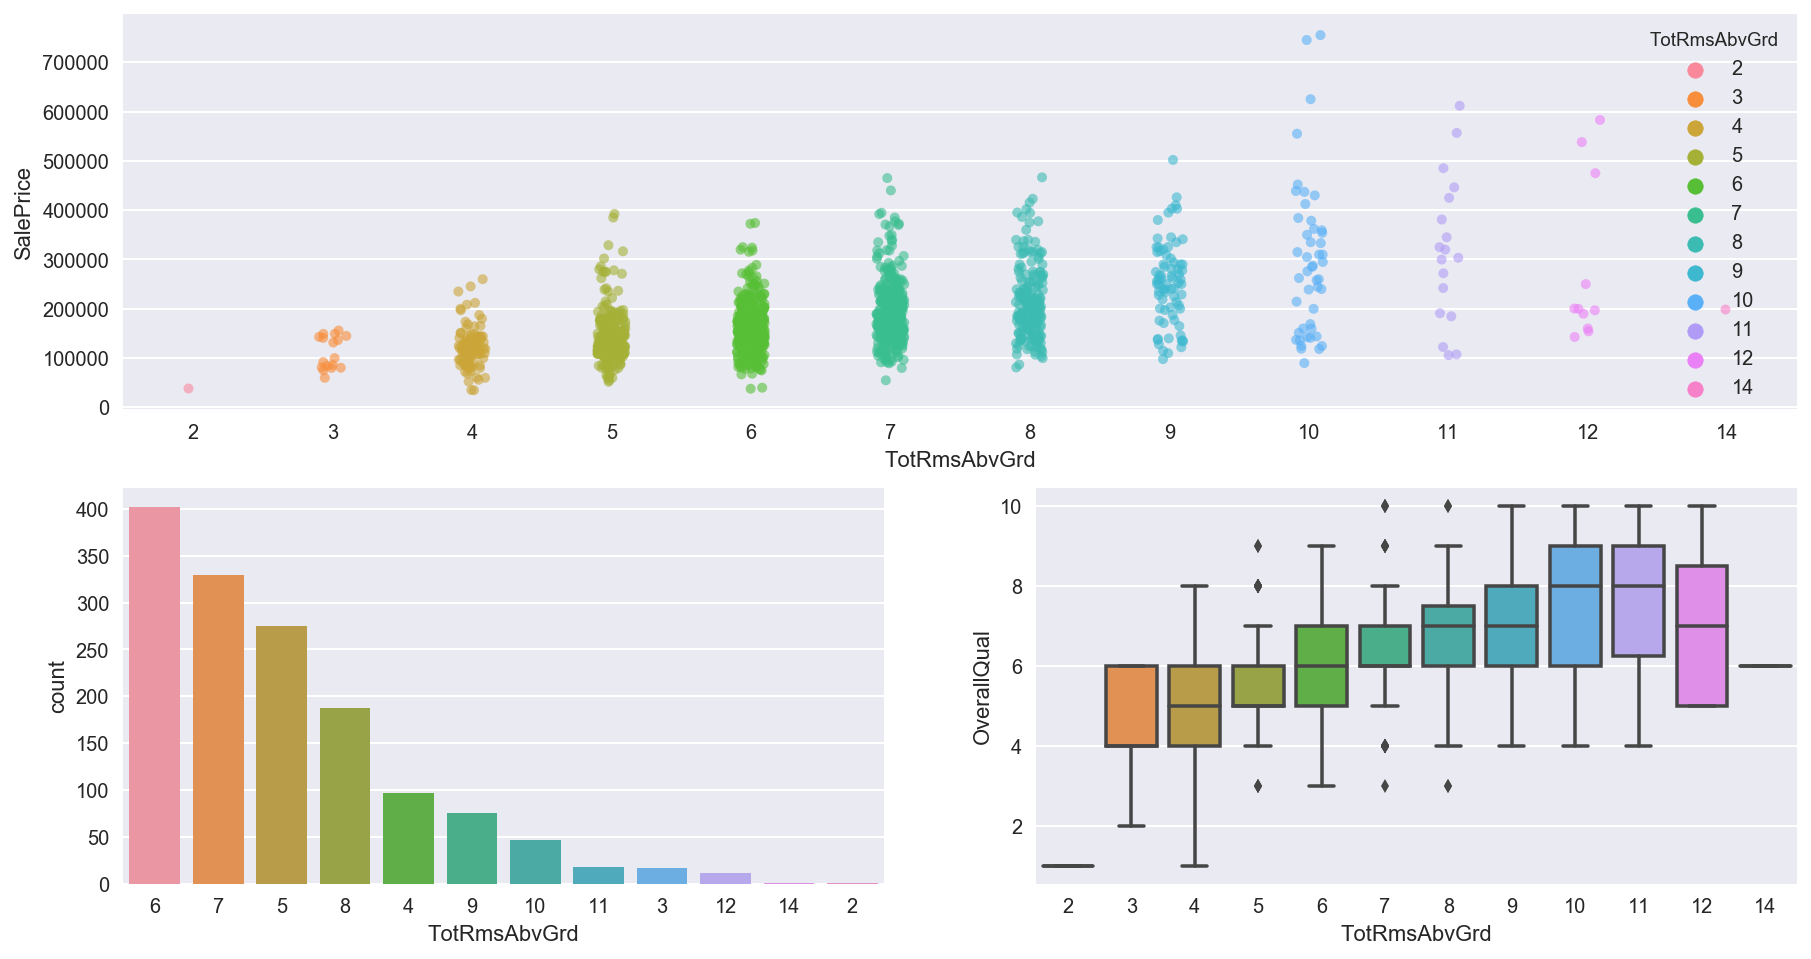

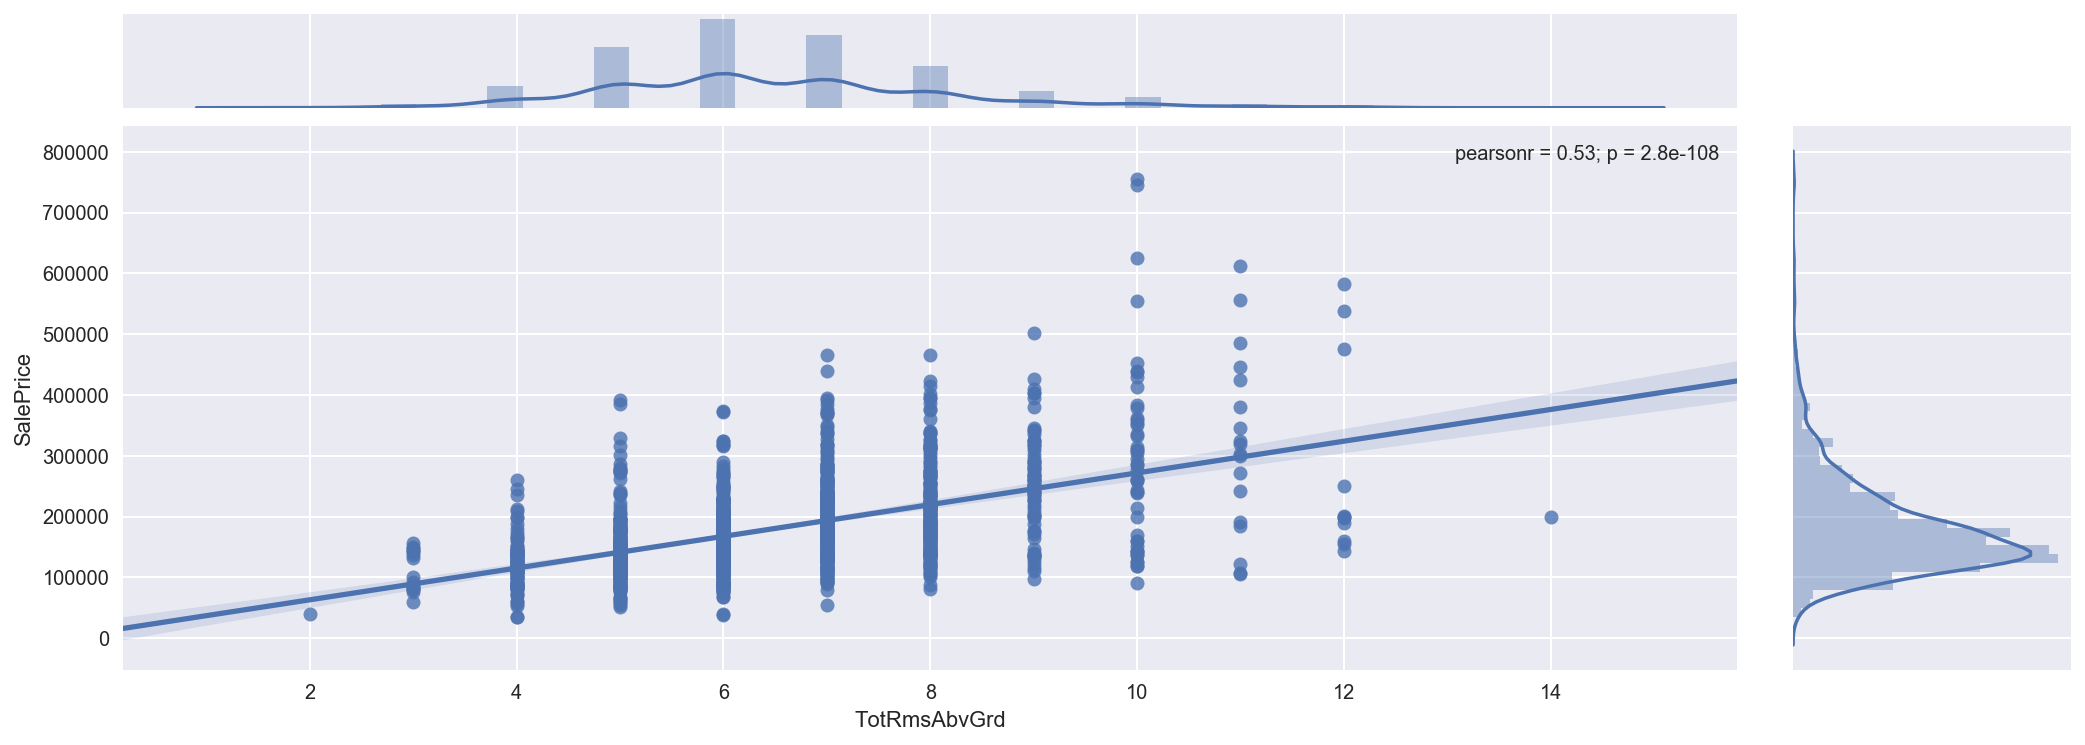

In [21]:
# Stripplot TotRmsAbvGrd / SalePrice
plt.figure(figsize=(15,8))
ax1 = plt.subplot(2,1,1)
sns.stripplot(x='TotRmsAbvGrd', y='SalePrice', hue='TotRmsAbvGrd', data=train, jitter=True, alpha=0.6, ax=ax1)

# Countplot TotRmsAbvGrd
ax2 = plt.subplot2grid((2,2), (1,0))
sns.countplot(x = "TotRmsAbvGrd", data=train , ax = ax2, order = train["TotRmsAbvGrd"].value_counts().index)

# Boxplot TotRmsAbvGrd / OverallQual
ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = 'TotRmsAbvGrd', y = 'OverallQual', data = train, ax=ax3)
plt.show()

# Jointplot TotRmsAbvGrd / SalePrice
grid = sns.jointplot(x = "TotRmsAbvGrd", y = "SalePrice", data=train, kind="reg", size = 8)
grid.fig.set_size_inches(15,5)

#### Comment :

1. The higher the number of rooms (TotRmsAbvGrd), the higher the house prices tend to be.
2. The better the room, the better the quality of the house.

### 3. Feature Engineering

### 3-1 Missing Values

#### 3-1-1 Join Train and Test set
Combine Train and Test data and process missing data at once

In [22]:
# Save lenth of train and test set
ntrain = train.shape[0]
ntest = test.shape[0]

# Combine Train and Test data 
all_data = pd.concat((train, test)).reset_index(drop=True)
print("All data size is {}".format(all_data.shape))

All data size is (2919, 81)


#### 3-1-2 Statuse of missing values

Variables with Missing Qty :  [34]
Total Missing values Qty :  [13965]


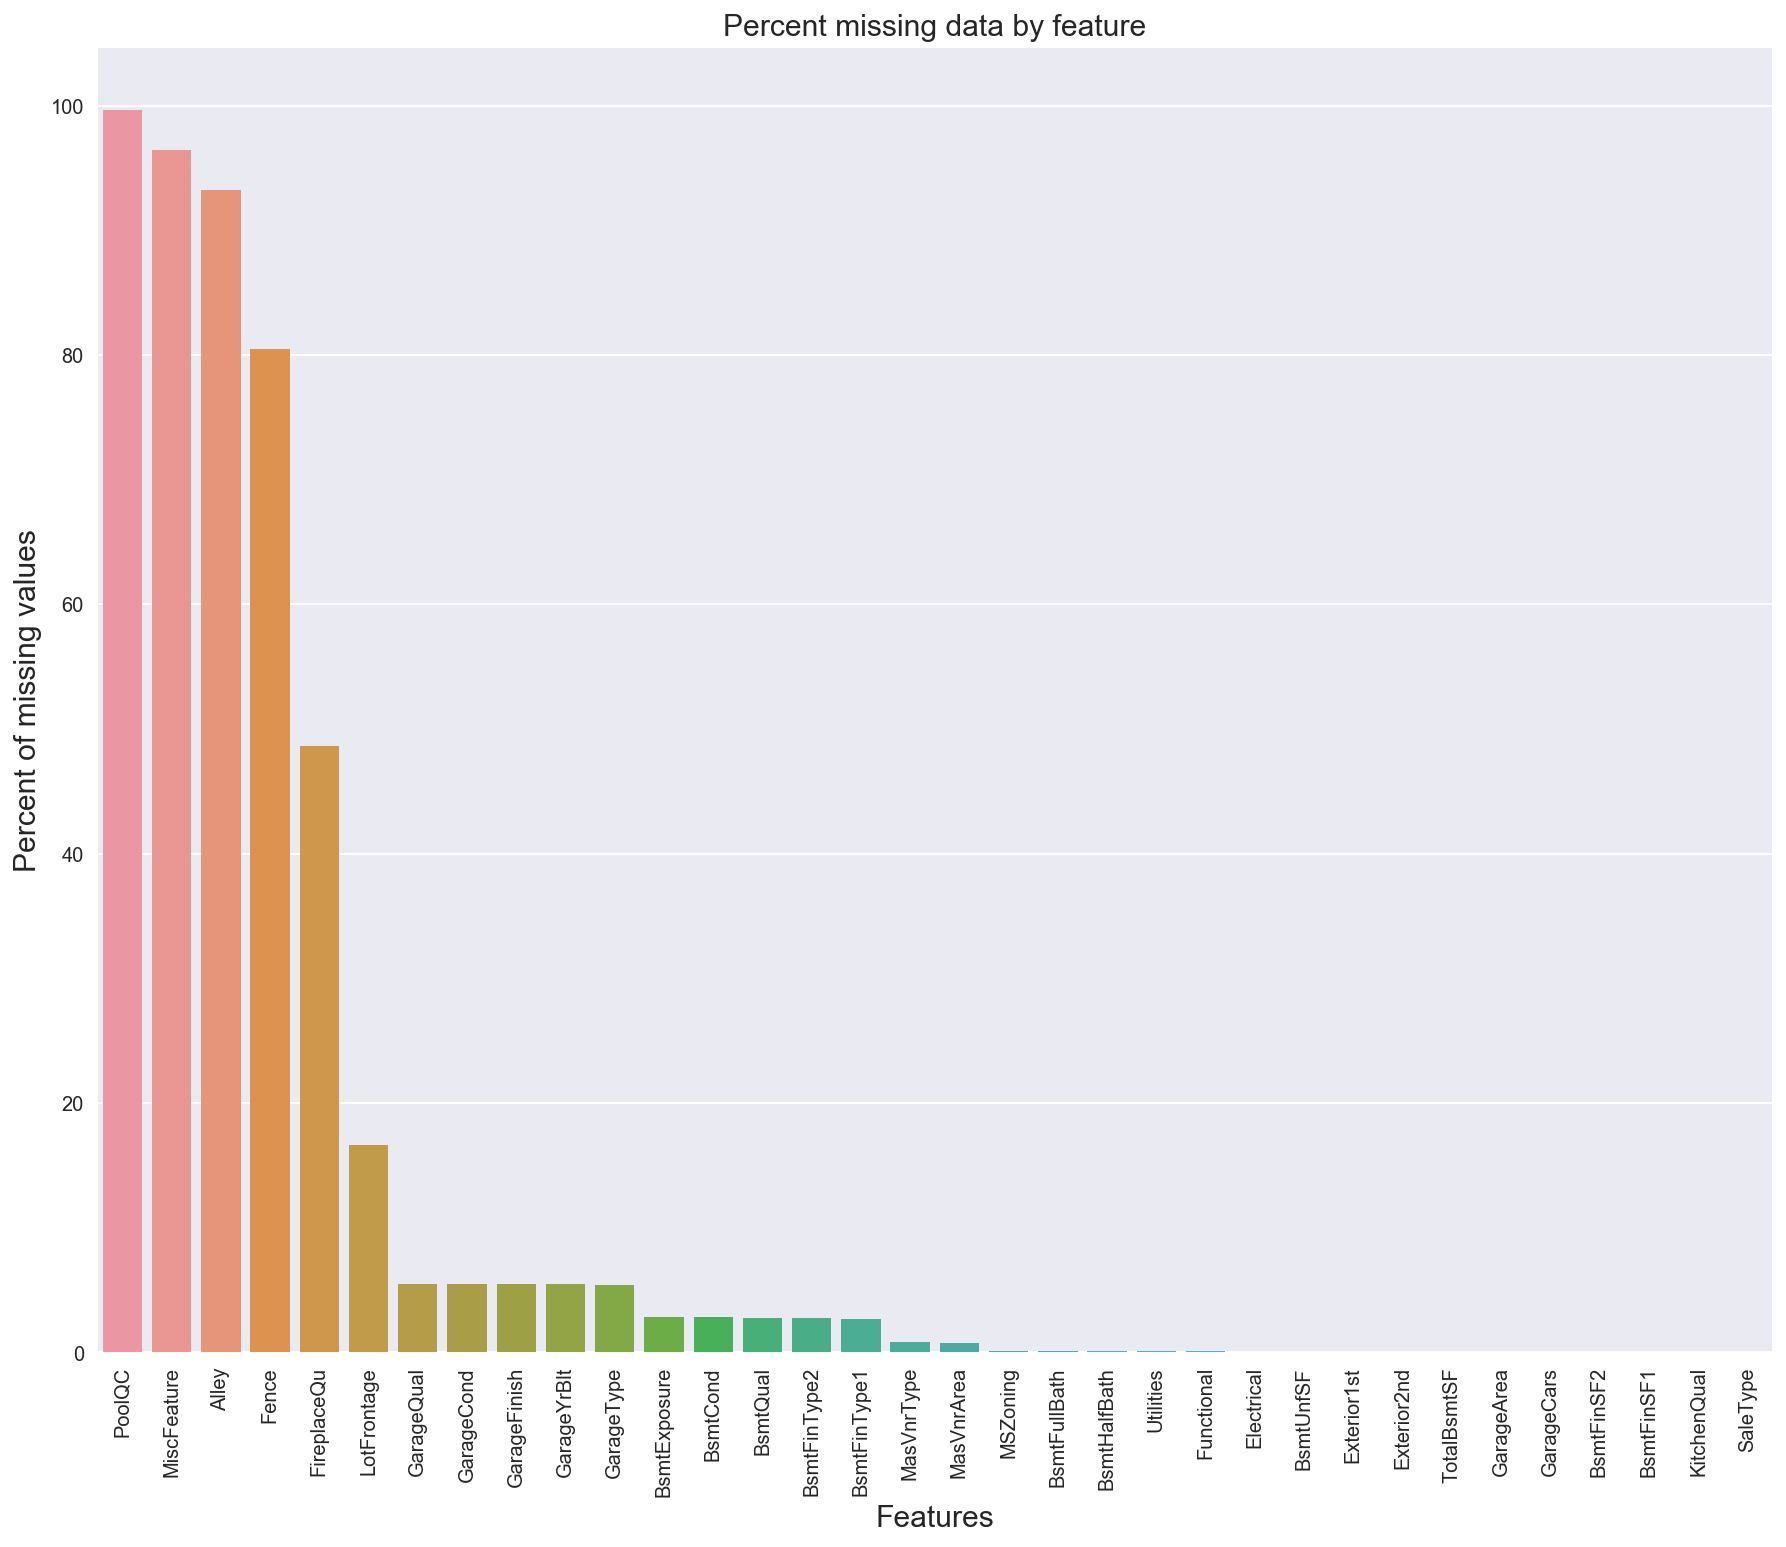

In [23]:
# To maintain the independence of all_data, copy it to all_data_cp and proceed with it
all_data_cp = all_data.copy()

# Drop saleprice column 
all_data_cp.drop(['SalePrice'], axis=1, inplace=True)


# Chck missing values 
all_data_null = all_data_cp.isnull().sum()
all_data_null = all_data_null.drop(all_data_null[all_data_null == 0].index).sort_values(ascending=False)
all_data_missing = pd.DataFrame({'Missing Numbers' :all_data_null})
all_data_null =  all_data_null / len(all_data_cp)*100

# Barplot missing values
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_null.index, y=all_data_null)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

print("Variables with Missing Qty : " , all_data_missing.count().values)
print("Total Missing values Qty : " , all_data_missing.sum().values)

34 attributes have missing values. Most of times NA means lack of subject described by attribute, like missing pool, fence, no garage and basement.

#### 3-1-3 Missing Values processing

MSSubClass

 - Description : Identifies the type of dwelling involved in the sale
 - Process : Missing values are filled with None because the data is evenly distributed and hard to judge by specific value

In [24]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

SaleType
 - Description: Type of sale   
 - Process : 87% of data uses WD (Warranty Deed - Conventional) method, so Missing Data is filled with WD

In [25]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

KitchenQual:
 - Description : Kitchen quality
 - Process : 52% of the total data is classified as TA (Typical / Average), so Missing Data is filled with TA

In [26]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

BsmtFinSF1 & BsmtFinSF2

 - Description : Finished basement square feet
 - Process : In both data, about 35% of the data is zero. Therefore, Missing Data is also filled with 0.

In [27]:
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].fillna(0)
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(0)

GarageCars  &  GarageArea & GarageYrBlt

 - Description : Qty, Size, year of garage 
 - Process : Missing data means that there is no garage, so filling Missing Data with 0

In [28]:
all_data['GarageCars'] = all_data['GarageCars'].fillna(0)
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0)

TotalBsmtSF

 - Description : Total square feet of basement area
 - Process : Missing data means that there is no basement, so filling Missing Data with 0

In [29]:
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(0)

BsmtUnfSF

 - Description : Unfinished square feet of basement area
 - Process : Missing data means that there is no basement, so filling Missing Data with 0

In [30]:
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(0)

BsmtQual & BsmtCond

 - Description : Evaluates the height and condition of the basement
 - Process : Missing values in BsmtQual and BsmtCond data are converted to None because there is no basement

In [31]:
all_data['BsmtQual']=all_data['BsmtQual'].fillna('None')
all_data['BsmtCond']=all_data['BsmtCond'].fillna('None')

BsmtExposure & BsmtFinType1 & BsmtFinType2

 - Description : Refers to walkout or garden level walls and Rating of basement finished area
 - Process : In this case, the missing values are a house without a basement.

In [32]:
all_data['BsmtExposure']=all_data['BsmtExposure'].fillna('None')
all_data['BsmtFinType1']=all_data['BsmtFinType1'].fillna('None')
all_data['BsmtFinType2']=all_data['BsmtFinType2'].fillna('None')

BsmtFullBath & BsmtHalfBath

 - Description : Basement full and half bathrooms 
 - Process : Missing values mean there is no bath so fill them with 0

In [33]:
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(0)
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(0)

Electrical

 - Description : Electrical system
 - Process : Approximately 92% of the data is SBrkr. Fill Missing Data with mode value(SBrkr)

In [34]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

Utilities

 - Description : Type of utilities available
 - Process : Since 100% of the test data is composed of AllPub, it is judged that there is no big meaning. So drop the column out

In [35]:
all_data.drop(['Utilities'], axis=1, inplace=True)

MSZoning

 - Description : Identifies the general zoning classification of the sale
 - Process : More than 78% of the data is made up of RL, so the missing values are processed using the mode value.

In [36]:
all_data['MSZoning']=all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

MasVnrArea

 - Description : Masonry veneer area in square feet
 - Process : About 60% of the data is 0, and it is thought that it is not decorated.

In [37]:
all_data['MasVnrArea']=all_data['MasVnrArea'].fillna(0)

MasVnrType

 - Description : Masonry veneer type 
 - Process : Approximately 60% of the data is missing, meaning that it is not decorated.

In [38]:
all_data['MasVnrType']=all_data['MasVnrType'].fillna('None')

GarageType

 - Description : Garage location
 - Process : Attchd, Detchd, BuiltIn, Basment, 2Types, CarPort There are 6 categories, where missing value represents the house without garage and converts it to None value.

In [39]:
all_data['GarageType']=all_data['GarageType'].fillna('None')

GarageYrBlt

 - Description : Year garage was built
 - Process : Since the garage construction year is usually the same as the construction year, the Nan value is to be filled with the construction year

In [40]:
all_data['GarageYrBlt'][all_data['GarageYrBlt']>2150]
all_data['GarageYrBlt']=all_data['GarageYrBlt'].fillna(all_data['YearBuilt'][ all_data['GarageYrBlt'].isnull()])

GarageFinish, GarageCond, GarageQual

 - Description : Garage Quality Related Categories
 - Process : Features are all similar data and have the same number of missing values. Missing values are those without garage and are treated as None values.

In [41]:
all_data['GarageFinish']=all_data['GarageFinish'].fillna('None')
all_data['GarageCond']=all_data['GarageCond'].fillna('None')
all_data['GarageQual']=all_data['GarageQual'].fillna('None')

LotFrontage

 - Description : Linear feet of street connected to property
 - Process : Group the Neighborhood and treat it as a median in the same Neighborhood

In [42]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

FireplaceQu

 - Description : Fireplace quality
 - Process : Missing value indicates that there is no fireplace and it is converted to None value.

In [43]:
all_data['FireplaceQu']=all_data['FireplaceQu'].fillna('None')

Fence

 - Description : Fence quality
 - Process : Missing values are fence-less, and convert to None

In [44]:
all_data['Fence']=all_data['Fence'].fillna('None')

Alley

 - Description : Type of alley access to property
 - Process : Grvl, and Pave. The missing values indicate that there are no adjacent alleys, and are converted to None values

In [45]:
all_data['Alley']=all_data['Alley'].fillna('None')

Functional

 - Description : Home functionality (Assume typical unless deductions are warranted)

 - Process : Since more than 93% of the total data is in the Typ format, the missing values are expected to be included in these functions

In [46]:
all_data['Functional']= all_data["Functional"].fillna("Typ")

MiscFeature 

 - Description : Miscellaneous feature not covered in other categories
 - Process : The missing values are houses that do not contain these features, so replace them with none

In [47]:
all_data['MiscFeature']=all_data['MiscFeature'].fillna('None')

PoolQC

 - Description : Pool quality
 - Process : The missing values are houses that do not contain a pool, so replace them with none

In [48]:
all_data['PoolQC']=all_data['PoolQC'].fillna('None')

Exterior1st & Exterior2nd

 - Description : Exterior covering on house
 - 처리 방법 : 대부분의 외장재가 VinylSd로 되어있어 VinylSd로 예측 nan값을 mode로 채워줌

In [49]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

### 3-2 Feature Correlation

#### 3-2-1 Numerical Features
To explore the features, we will use Correlation matrix (heatmap style). 

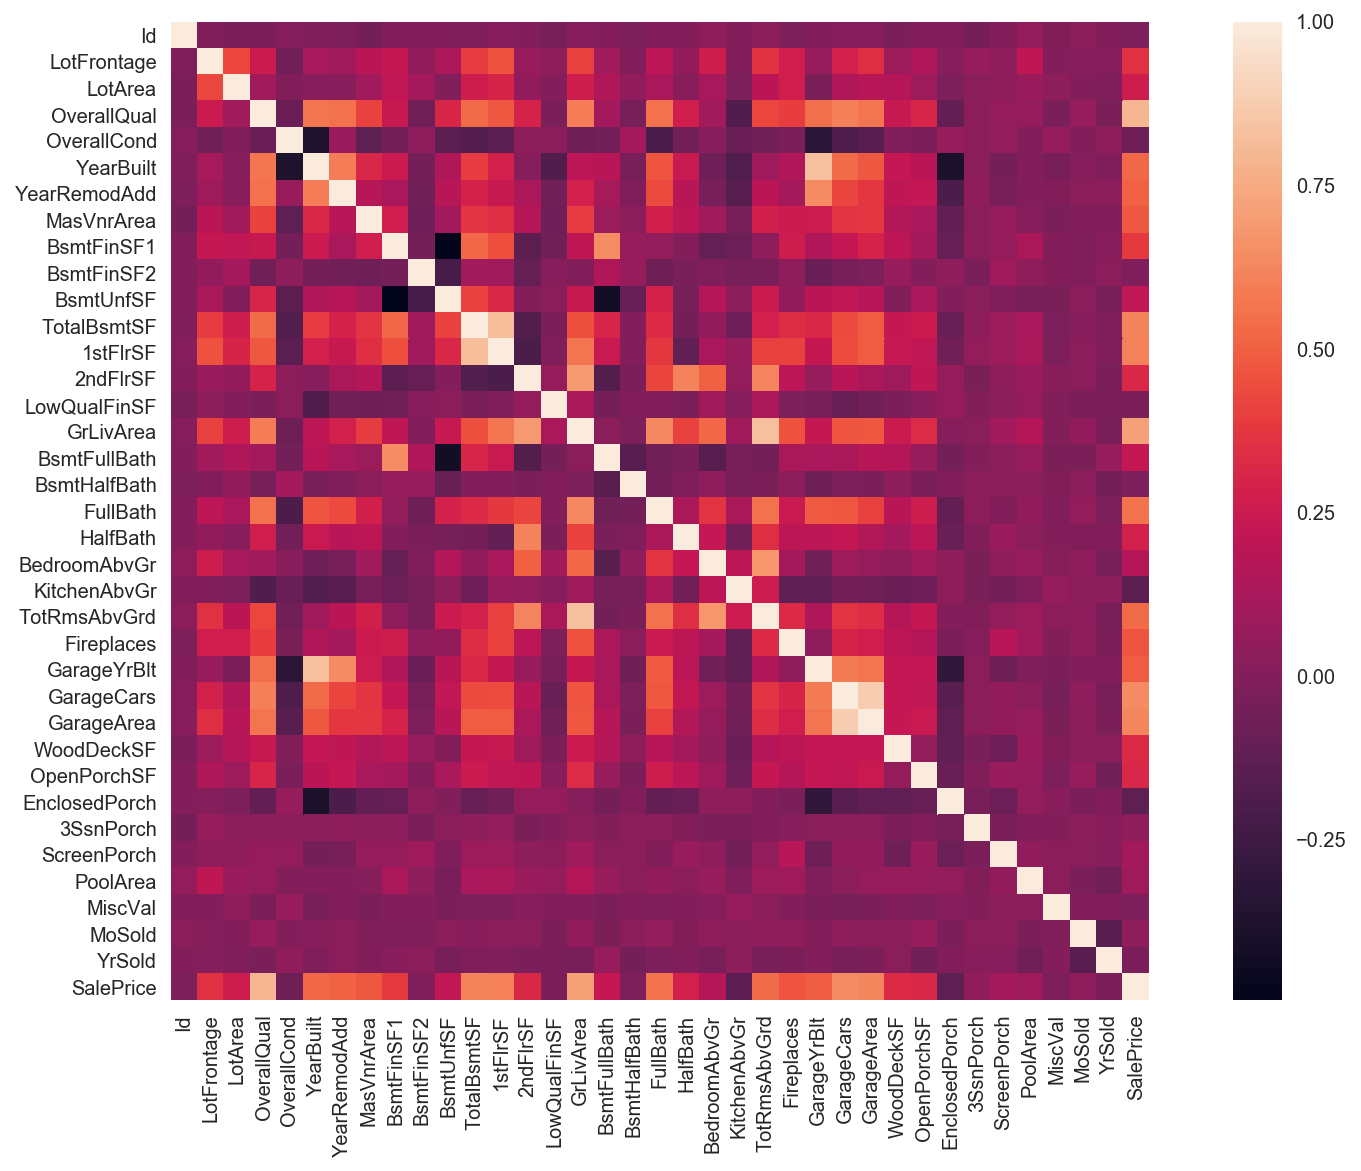

In [50]:
corrmat = train.corr()
f, ax = plt.subplots(figsize = (15,9))
sns.heatmap(corrmat, vmax = 1, square=True)

This heatmap is the best way to get a quick overview of features relationships. At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs.

'SalePrice' correlation matrix (High rank 15)

In [51]:
# 'SalePrice correlation (High rank 15)
# k is number of variables 
k = 15

cor_numerical_cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index 
print("Numerical Features Qty :" ,len(cor_numerical_cols), "\n")
print("Numerical Features     : \n",list(cor_numerical_cols))

Numerical Features Qty : 15 

Numerical Features     : 
 ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1']


#### Comments :

1. There are many strong correlations between SalePrice and variables.  OverallQual and GrLivArea are strongly correlated with SalePrice.

#### 3-2-2 Categorical Features

In [52]:
# Select categorical features from train set
train_cat = train[categorical_features]
y_train_d = train['SalePrice']

# Dummy of category data
train_cat_dummies = pd.get_dummies(train_cat)

# Concatenate dummied categorical data with SalePrice
train_cat = pd.concat([y_train_d, train_cat_dummies], axis=1)
corrmat2 = train_cat.corr()

# High correlation coefficient 10
k = 10

cor_categorical_cols = corrmat2.nlargest(k, 'SalePrice')['SalePrice'].index 
cor_categorical_cols

Index(['SalePrice', 'BsmtQual_Ex', 'KitchenQual_Ex', 'Foundation_PConc',
       'ExterQual_Gd', 'ExterQual_Ex', 'BsmtFinType1_GLQ', 'HeatingQC_Ex',
       'GarageFinish_Fin', 'Neighborhood_NridgHt'],
      dtype='object')

### 3-3 Determination of outliers and variables using OLS model
#### OLS (Ordinary least squares ) :  
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being predicted) in the given dataset and those predicted by the linear function. 

#### 3-3-1 Model by all numerical Features

In [53]:
# Prepare train and test set
train = all_data[:ntrain]
test = all_data[ntrain:]

# Add_constant 
train = sm.add_constant(train)
train.tail()

const  1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType  \
1455    1.0       953       694          0  None             3     1Fam   
1456    1.0      2073         0          0  None             3     1Fam   
1457    1.0      1188      1152          0  None             4     1Fam   
1458    1.0      1078         0          0  None             2     1Fam   
1459    1.0      1256         0          0  None             3     1Fam   

     BsmtCond BsmtExposure  BsmtFinSF1  ...    SalePrice SaleType ScreenPorch  \
1455       TA           No         0.0  ...     175000.0       WD           0   
1456       TA           No       790.0  ...     210000.0       WD           0   
1457       Gd           No       275.0  ...     266500.0       WD           0   
1458       TA           Mn        49.0  ...     142125.0       WD           0   
1459       TA           No       830.0  ...     147500.0       WD           0   

      Street  TotRmsAbvGrd TotalBsmtSF  WoodDeckSF YearBuilt YearRemodAdd  \
1455    Pave             7       953.0           0      1999         2000   
1456    Pave             7      1542.0         349      1978         1988   
1457    Pave             9      1152.0           0      1941         2006   
1458    Pave             5      1078.0         366      1950         1996   
1459    Pave             6      1256.0         736      1965         1965   

     YrSold  
1455   2007  
1456   2010  
1457   2010  
1458   2010  
1459   2008  

[5 rows x 81 columns]

In [54]:
# Create train data with numerical features
train_n = train[numerical_features]

# Drop Id and SalePrice of data with numerical features
train_n = train_n.drop(['Id', 'SalePrice'], axis=1)

# Normalization by applying log to SalePrice
y_train_l = np.log1p(y_train_d)

In [55]:
# Apply to OLS model and save as model1_1
model1_1 = sm.OLS(y_train_l, train_n)
result1_1 = model1_1.fit()

#### 3-3-2 Model by all categorical Features

In [56]:
# Excludes Utilities
categorical_features = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

# Convert data from categorical features into dummies
train_c = pd.get_dummies(train[categorical_features])
train_c.tail()

MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
1455               0               0               0               0   
1456               0               0               0               0   
1457               0               0               0               0   
1458               0               0               0               0   
1459               0               0               0               0   

      MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
1455              0              0              0              0   
1456              1              0              0              0   
1457              0              0              0              0   
1458              1              0              0              0   
1459              1              0              0              0   

      MSSubClass_50  MSSubClass_60          ...            SaleType_ConLw  \
1455              0              1          ...                         0   
1456              0              0          ...                         0   
1457              0              0          ...                         0   
1458              0              0          ...                         0   
1459              0              0          ...                         0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
1455             0             0            1                      0   
1456             0             0            1                      0   
1457             0             0            1                      0   
1458             0             0            1                      0   
1459             0             0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   
1459                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
1455                     1                      0  
1456                     1                      0  
1457                     1                      0  
1458                     1                      0  
1459                     1                      0  

[5 rows x 279 columns]

In [57]:
# Apply to OLS model and save as model1_2
model1_2 = sm.OLS(y_train_l, train_c)
result1_2 = model1_2.fit()

#### 3-3-3 Model by numerical and categorical features together

In [58]:
# Concatenate numerical and categorical(dummy) data
train_all = pd.concat([train_n, train_c], axis=1)
train_all.tail()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1455         62.0     7917            6            5       1999          2000   
1456         85.0    13175            6            6       1978          1988   
1457         66.0     9042            7            9       1941          2006   
1458         68.0     9717            5            6       1950          1996   
1459         75.0     9937            5            6       1965          1965   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF          ...            \
1455         0.0         0.0         0.0      953.0          ...             
1456       119.0       790.0       163.0      589.0          ...             
1457         0.0       275.0         0.0      877.0          ...             
1458         0.0        49.0      1029.0        0.0          ...             
1459         0.0       830.0       290.0      136.0          ...             

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1455               0             0             0            1   
1456               0             0             0            1   
1457               0             0             0            1   
1458               0             0             0            1   
1459               0             0             0            1   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
1455                      0                      0                     0   
1456                      0                      0                     0   
1457                      0                      0                     0   
1458                      0                      0                     0   
1459                      0                      0                     0   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
1455                     0                     1                      0  
1456                     0                     1                      0  
1457                     0                     1                      0  
1458                     0                     1                      0  
1459                     0                     1                      0  

[5 rows x 314 columns]

In [59]:
# Apply to OLS model and save as model1_3
model1_3 = sm.OLS(y_train_l, train_all)
result1_3 = model1_3.fit()

#### 3-3-4 Model by high correlation coefficient numerical features with SalePrice (Top 14)

In [60]:
# Storing 14 numerical variables with high correlation coefficients
cor_numerical_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1']

# Create data using 14 numerical variables
train_nc = train[cor_numerical_cols]
train_nc.tail()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
1455            6       1647         2.0       460.0        953.0       953   
1456            6       2073         2.0       500.0       1542.0      2073   
1457            7       2340         1.0       252.0       1152.0      1188   
1458            5       1078         1.0       240.0       1078.0      1078   
1459            5       1256         1.0       276.0       1256.0      1256   

      FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  GarageYrBlt  \
1455         2             7       1999          2000       1999.0   
1456         2             7       1978          1988       1978.0   
1457         2             9       1941          2006       1941.0   
1458         1             5       1950          1996       1950.0   
1459         1             6       1965          1965       1965.0   

      MasVnrArea  Fireplaces  BsmtFinSF1  
1455         0.0           1         0.0  
1456       119.0           2       790.0  
1457         0.0           2       275.0  
1458         0.0           0        49.0  
1459         0.0           0       830.0

In [61]:
# Apply to OLS model and save as model1_4
model1_4 = sm.OLS(y_train_l, train_nc)
result1_4 = model1_4.fit()

#### 3-3-5 Model by high correlation coefficient numerical features (14 EA) and  categorical features (5 EA)

In [62]:
#  Create data using 5 categorical variables
cor_categorical_cols = ['Neighborhood', 'ExterQual', 'KitchenQual',
       'BsmtQual', 'PoolQC']
train_cc = train[cor_categorical_cols]

# Concatenate numerical and categorical data
train_all_c = pd.concat([train_nc, train_cc], axis=1)
train_all_c.tail()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
1455            6       1647         2.0       460.0        953.0       953   
1456            6       2073         2.0       500.0       1542.0      2073   
1457            7       2340         1.0       252.0       1152.0      1188   
1458            5       1078         1.0       240.0       1078.0      1078   
1459            5       1256         1.0       276.0       1256.0      1256   

      FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  GarageYrBlt  \
1455         2             7       1999          2000       1999.0   
1456         2             7       1978          1988       1978.0   
1457         2             9       1941          2006       1941.0   
1458         1             5       1950          1996       1950.0   
1459         1             6       1965          1965       1965.0   

      MasVnrArea  Fireplaces  BsmtFinSF1 Neighborhood ExterQual KitchenQual  \
1455         0.0           1         0.0      Gilbert        TA          TA   
1456       119.0           2       790.0       NWAmes        TA          TA   
1457         0.0           2       275.0      Crawfor        Ex          Gd   
1458         0.0           0        49.0        NAmes        TA          Gd   
1459         0.0           0       830.0      Edwards        Gd          TA   

     BsmtQual PoolQC  
1455       Gd   None  
1456       Gd   None  
1457       TA   None  
1458       TA   None  
1459       TA   None

In [63]:
# Dummy categorical data and add constant 
train_all_c = pd.get_dummies(train_all_c)
train_all_c = sm.add_constant(train_all_c)

train_all_c.tail()

const  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
1455    1.0            6       1647         2.0       460.0        953.0   
1456    1.0            6       2073         2.0       500.0       1542.0   
1457    1.0            7       2340         1.0       252.0       1152.0   
1458    1.0            5       1078         1.0       240.0       1078.0   
1459    1.0            5       1256         1.0       276.0       1256.0   

      1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt     ...       \
1455       953         2             7       1999     ...        
1456      2073         2             7       1978     ...        
1457      1188         2             9       1941     ...        
1458      1078         1             5       1950     ...        
1459      1256         1             6       1965     ...        

      KitchenQual_TA  BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_None  \
1455               1            0            0            1              0   
1456               1            0            0            1              0   
1457               0            0            0            0              0   
1458               0            0            0            0              0   
1459               1            0            0            0              0   

      BsmtQual_TA  PoolQC_Ex  PoolQC_Fa  PoolQC_Gd  PoolQC_None  
1455            0          0          0          0            1  
1456            0          0          0          0            1  
1457            1          0          0          0            1  
1458            1          0          0          0            1  
1459            1          0          0          0            1  

[5 rows x 57 columns]

In [64]:
# Apply to OLS model and save as model1_5
model1_5 = sm.OLS(y_train_l, train_all_c)
result1_5 = model1_5.fit()

#### 3-3-6 Multi-collinearity and variance analysis between variables

#### (1) Multi-collinearity

 -  Multicollinearity refers to the case where a part of the independent variable can be represented by a combination of other independent variables. This occurs when the independent variables are not independent of each other but have strong mutual correlation.
 -  If there is multicollinearity, the conditional number of the covariance matrix of the independent variable increases
 - VIF (Variance Inflation Factor) is used as a method of selecting interdependent independent variables. It can be seen that the higher the number, the more dependent on other variables
 $$
 \text{VIF}_i = \frac{\sigma^2}{(n-1)\text{Var}[X_i]}\cdot \frac{1}{1-R_i^2}
 $$

In [65]:
# Create VIF dataframe
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(train_all_c.values, i) for i in range(train_all_c.values.shape[1])]
vif["features"] = train_all_c.columns
vif.sort_values("VIF Factor", ascending = True).head(20)

VIF Factor              features
0     0.000000                 const
13    1.634796            Fireplaces
12    1.656497            MasVnrArea
14    1.677789            BsmtFinSF1
11    1.934078           GarageYrBlt
10    2.316177          YearRemodAdd
7     2.641831              FullBath
8     3.883378          TotRmsAbvGrd
1     3.923020           OverallQual
4     5.732055            GarageArea
6     6.077954              1stFlrSF
3     6.552045            GarageCars
2     6.713399             GrLivArea
9     6.738343             YearBuilt
5     6.989393           TotalBsmtSF
37         inf  Neighborhood_StoneBr
38         inf   Neighborhood_Timber
39         inf  Neighborhood_Veenker
40         inf          ExterQual_Ex
41         inf          ExterQual_Fa

#### Comment :

1. Multilinearity between variables extracted except for categorical features is low.

#### (2) Analysis of variance on categorical features

 - Analysis of variance (ANOVA) is a method to evaluate the performance of linear regression analysis using the relationship between the variance of dependent variables and the variance of independent variables
 - The analysis of variance can be applied to the performance comparison of two different linear regression analyzes. It can also be used to quantitatively analyze the effect of each category value when the independent variable is a category variable
 - TSS : Range of movement of dependent variable values
 - ESS : Range of predictive bass movements from model
 - RSS : The range of motion of residuals, that is the magnitude of the error
 
 $$
 \dfrac{\text{ESS}}{K-1} \div  \dfrac{\text{RSS}}{N-K} = \dfrac{R^2/(K-1)}{(1-R^2)/(N-K)} \sim F(K-1, N-K)
 $$

- Variance analysis table
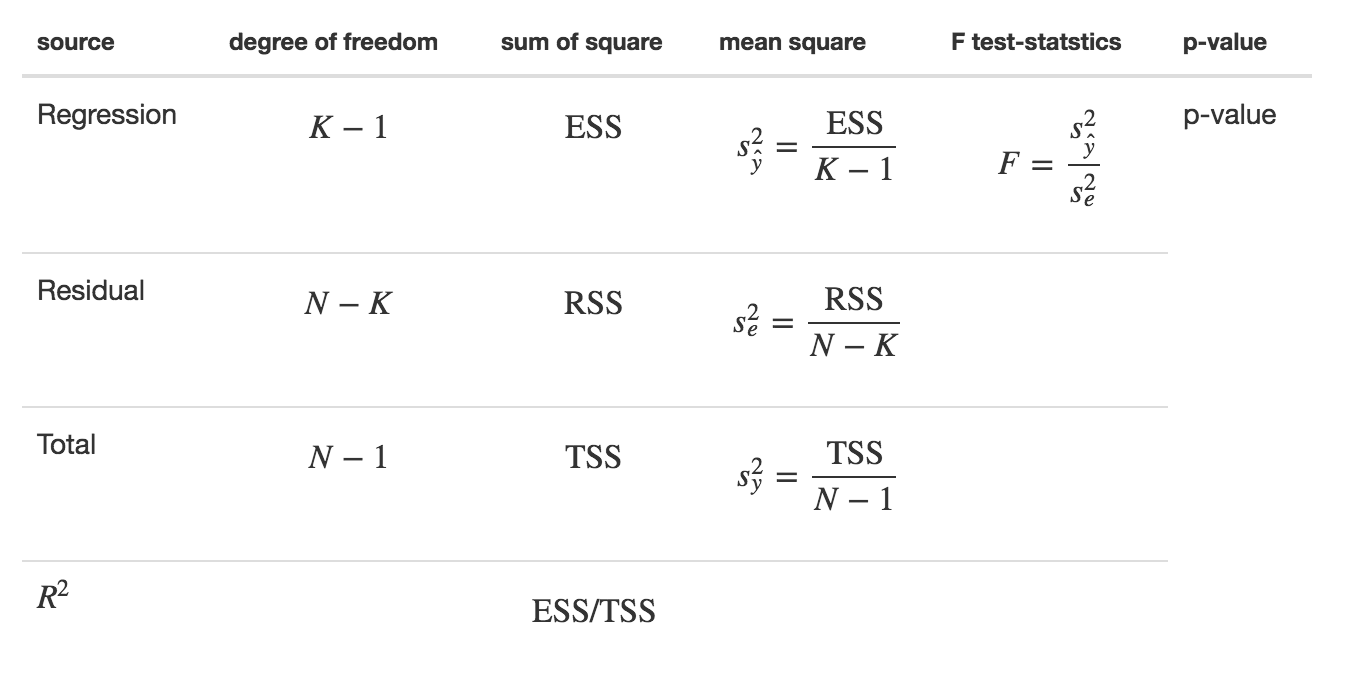

In [66]:
# Anova test : Neighborhood 
model_cat = sm.OLS.from_formula("SalePrice ~ C(Neighborhood)", data=train)
sm.stats.anova_lm(model_cat.fit())

df        sum_sq       mean_sq          F         PR(>F)
C(Neighborhood)    24.0  5.023606e+12  2.093169e+11  71.784865  1.558600e-225
Residual         1435.0  4.184305e+12  2.915892e+09        NaN            NaN

In [67]:
# Anova test : ExterQual
model_cat = sm.OLS.from_formula("SalePrice ~ C(ExterQual)", data=train)
sm.stats.anova_lm(model_cat.fit())

df        sum_sq       mean_sq           F         PR(>F)
C(ExterQual)     3.0  4.395744e+12  1.465248e+12  443.334831  1.439551e-204
Residual      1456.0  4.812167e+12  3.305060e+09         NaN            NaN

In [68]:
# Anova test : KitchenQual
model_cat = sm.OLS.from_formula("SalePrice ~ C(KitchenQual)", data=train)
sm.stats.anova_lm(model_cat.fit())

df        sum_sq       mean_sq           F         PR(>F)
C(KitchenQual)     3.0  4.204320e+12  1.401440e+12  407.806352  3.032213e-192
Residual        1456.0  5.003592e+12  3.436533e+09         NaN            NaN

In [69]:
# Anova test : BsmtQual
model_cat = sm.OLS.from_formula("SalePrice ~ C(BsmtQual)", data=train)
sm.stats.anova_lm(model_cat.fit())

df        sum_sq       mean_sq           F         PR(>F)
C(BsmtQual)     4.0  4.281621e+12  1.070405e+12  316.148635  8.158548e-196
Residual     1455.0  4.926290e+12  3.385766e+09         NaN            NaN

In [70]:
# Anova test : PoolQC
model_cat = sm.OLS.from_formula("SalePrice ~ C(PoolQC)", data=train)
sm.stats.anova_lm(model_cat.fit())

df        sum_sq       mean_sq          F        PR(>F)
C(PoolQC)     3.0  1.951702e+11  6.505672e+10  10.509853  7.700989e-07
Residual   1456.0  9.012741e+12  6.190069e+09        NaN           NaN

#### Comments :

1. Anova test shows that the five category variables are significant

#### 3-3-7 Comparison of model performance by using variables

 1) $R_{adj}^2$ Performance
 - In the linear regression model, the value of the coefficient of determination $( R^2 )$ always increases when an independent variable is added
 
 - The coefficient that adjusts the value of the decision coefficient according to the number of independent variables K to offset the effect of addition of independent variables. The closer to 1, the better the model 
$$
R_{adj}^2 = 1 - \frac{n-1}{n-K}(1-R^2) = \dfrac{(n-1)R^2 +1-K}{n-K}
$$

In [71]:
print("result1_1.rsquared_adj :", result1_1.rsquared_adj)
print("result1_2.rsquared_adj :", result1_2.rsquared_adj)
print("result1_3.rsquared_adj :", result1_3.rsquared_adj)
print("result1_4.rsquared_adj :", result1_4.rsquared_adj)
print("result1_5.rsquared_adj :", result1_5.rsquared_adj)

result1_1.rsquared_adj : 0.999847679182
result1_2.rsquared_adj : 0.861679864865
result1_3.rsquared_adj : 0.933226462089
result1_4.rsquared_adj : 0.999816776142
result1_5.rsquared_adj : 0.867010499543


2) AIC (Akaike Information Criterion) Performance 
 - The AIC maximizes the Kullback-Leibler level between the probability distribution of the model and the data, and the smaller the value, the closer to the good model

$$
           \text{AIC} = -2\log L + 2K \
$$


In [72]:
print("result1_1.aic :", result1_1.aic)
print("result1_2.aic :", result1_2.aic)
print("result1_3.aic :", result1_3.aic)
print("result1_4.aic :", result1_4.aic)
print("result1_5.aic :", result1_5.aic)

result1_1.aic : -1393.39487961
result1_2.aic : -1214.71731639
result1_3.aic : -2251.68847571
result1_4.aic : -1142.39296603
result1_5.aic : -1430.76835767


3) BIC(Bayesian Information Criterion) Perfomance 
 - BIC is derived from the value for measuring the model likelihood in the given data under the assumption that the data is an exponential family. The smaller the value, the closer to the good model

$$
           \text{BIC} = -2\log L + K\log n\
$$


In [73]:
print("result1_1.bic :", result1_1.bic)
print("result1_2.bic :", result1_2.bic)
print("result1_3.bic :", result1_3.bic)
print("result1_4.bic :", result1_4.bic)
print("result1_5.bic :", result1_5.bic)

result1_1.bic : -1218.95055302
result1_2.bic : 1.106777987
result1_3.bic : -861.420054741
result1_4.bic : -1068.38628203
result1_5.bic : -1155.88638851


#### Comment : 

1. Adj. $R^2$: Models 1 and 4 are the highest with 0.99 and have similar performance
2. AIC : Models 1 and 3 are low
3. BIC : Models 1 and 3 are low
4. In conclusion, future model verification will be based on model 1

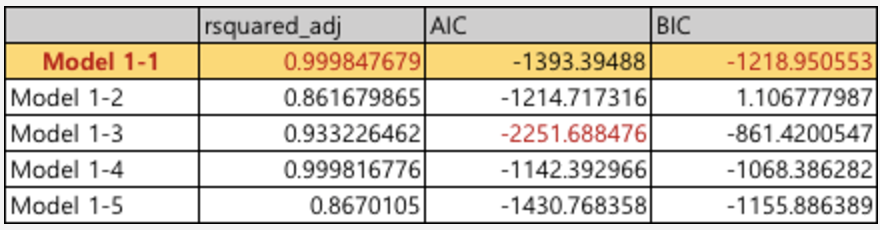

### 3-4 Outlier

1) Option1 : IQR (Interquartile Range)

 - IQR : Difference between quartile (Q3) and quartile (Q1) (Q3 - Q1)
 - Box-Whisker Plot outer vertical line represents 1.5 X IQR and the out-of-line point is called the outlier.

In [74]:
# IQR Outlier function
def detect_outliers(data, feature):
    
    Q1 = np.percentile(data[feature], 25)
    Q3 = np.percentile(data[feature], 75)
    IQR = Q3 - Q1
     
     # Outer vertical line represents 1.5 X IQR   
    outlier_length = 1.5 * IQR
        
    outliers = data[(data[feature] < Q1 - outlier_length) | (data[feature] > Q3 + outlier_length)].index.tolist()

    return outliers

In [75]:
# Detect outlier from GrLivArea, OverallQual, GarageArea 
GrLivArea_outliers = detect_outliers(train, "GrLivArea")
OverallQual_outliers = detect_outliers(train, "OverallQual")
GarageCars_outliers = detect_outliers(train, "GarageArea")

2) Option2 : Standardized resids

 - The residuals are divided by the standard deviation of the leverage and residuals and scaled to have the same standard deviation are called standardized residuals or normalized residuals
 
$$ 
r_i = \dfrac{e_i}{s\sqrt{1-h_{ii}}} 
$$

 - The standardization residual using the resid_pearson property of the RegressionResult of StatsModels. If it is larger than 2 ~ 4, it is called outlier.

In [76]:
# Model1_1 uses the standardized residual attribute for the output, and assigns an outlier larger than 2
idx_r = np.where(result1_1.resid_pearson > 2)[0]

3) Option3 : Cook's Distance 

 - If both the leverage and the residual size increase, Cook's Distance also increases.

$$ 
D_i = \frac{r_i^2}{\text{RSS}}\left[\frac{h_{ii}}{(1-h_{ii})^2}\right]
$$

 - Fox 'Outlier Recommendation is judged as an outlier when Cook's Distance is larger than the following reference value
 
 $$
 D_i > \dfrac{4}{N − K - 1}
 $$

In [77]:
# Designated outliers using Fox 'Outlier Recommendation on the output from model1_1
influence = result1_1.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(y_train_l) - len(train_n.columns) - 1)
idx_c = np.where(cooks_d2 > fox_cr)[0]

4) Check all outliers (option 1,2,3)

In [78]:
resid_outliers = idx_r.tolist()
cooks_outliers = idx_c.tolist()
print("resid_outliers:", len(resid_outliers),"개 \n", resid_outliers)
print("\t")
print("cooks_outliers:", len(cooks_outliers),"개 \n", cooks_outliers)
print("\t")
print("(IQR)GrLivArea_outliers:", len(GrLivArea_outliers),"개 \n", GrLivArea_outliers)
print("\t")
print("(IQR)OverallQual_outliers", len(OverallQual_outliers),"개 \n", OverallQual_outliers)
print("\t")
print("(IQR)GarageCars_outliers:", len(GarageCars_outliers),"개 \n", GarageCars_outliers)

#제거하길 추천한 outliers(data description)
# recommended_outliers = [523, 898, 1298]

resid_outliers: 26 개 
 [48, 142, 151, 178, 181, 218, 277, 378, 457, 473, 546, 669, 681, 688, 803, 807, 898, 970, 1046, 1059, 1065, 1075, 1170, 1181, 1182, 1423]
	
cooks_outliers: 67 개 
 [30, 48, 88, 93, 125, 144, 153, 178, 197, 205, 218, 277, 335, 346, 375, 378, 410, 431, 457, 462, 495, 523, 546, 588, 608, 628, 632, 635, 658, 662, 664, 666, 691, 705, 710, 728, 738, 803, 807, 810, 812, 898, 907, 916, 942, 968, 970, 1030, 1048, 1059, 1062, 1068, 1080, 1170, 1181, 1182, 1211, 1216, 1298, 1324, 1337, 1386, 1415, 1423, 1432, 1437, 1453]
	
(IQR)GrLivArea_outliers: 31 개 
 [58, 118, 185, 197, 231, 304, 324, 496, 523, 583, 608, 635, 691, 769, 798, 803, 961, 1024, 1031, 1046, 1142, 1169, 1173, 1175, 1182, 1268, 1298, 1312, 1328, 1353, 1386]
	
(IQR)OverallQual_outliers 2 개 
 [375, 533]
	
(IQR)GarageCars_outliers: 21 개 
 [178, 224, 270, 317, 408, 581, 664, 718, 803, 825, 1061, 1087, 1142, 1184, 1190, 1228, 1241, 1268, 1298, 1350, 1417]


5) Combination of outliers groups

 - IQR [ GrLivArea_outliers , OverallQual_outliers, GarageCars_outlier ] [used option1 outlier]

In [79]:
IQR = list(set(GrLivArea_outliers) | set(OverallQual_outliers) | set(GarageCars_outliers))
print("IQR outliers :", len(IQR),"개 \n", IQR)

IQR outliers : 50 개 
 [1024, 769, 1031, 1417, 523, 270, 1169, 1298, 1173, 1046, 1175, 533, 664, 408, 798, 1182, 1312, 1184, 803, 1061, 1190, 304, 1328, 178, 691, 185, 58, 825, 317, 1087, 961, 324, 197, 581, 583, 1350, 1353, 1228, 718, 1241, 608, 224, 231, 1386, 496, 1268, 118, 375, 1142, 635]


 - IQR2 [ GrLivArea_outliers,  GarageCars_outlier ] [used option1 outlier]

In [80]:
IQR2 = list(set(GrLivArea_outliers) & set(GarageCars_outliers))
print("IQR2 outliers :", len(IQR2),"개 \n", IQR2)

IQR2 outliers : 4 개 
 [1298, 803, 1268, 1142]


 - Resid & Cook distance [used option2 + option3 outlier]

In [81]:
resid_cooks = list(set(resid_outliers) | set(cooks_outliers))
print("Resid_Cooks_distance :", len(resid_cooks ),"개 \n", resid_cooks)

Resid_Cooks_distance : 77 개 
 [1030, 523, 1298, 277, 1046, 1048, 30, 546, 803, 1059, 1062, 807, 1065, 810, 812, 1068, 1324, 48, 1075, 1080, 1337, 588, 335, 88, 346, 93, 608, 1386, 628, 375, 632, 378, 635, 125, 898, 1415, 907, 142, 1423, 144, 1170, 658, 916, 662, 151, 664, 153, 410, 666, 1432, 669, 1181, 1182, 1437, 681, 1453, 942, 431, 688, 178, 691, 181, 1211, 1216, 705, 197, 710, 968, 457, 970, 205, 462, 728, 473, 218, 738, 495]


 - IQR & Resid & Cook distance [combine option1 + option2 + option3 outlier]

In [82]:
resid_cooks_IQR = list(set(resid_cooks) | set(IQR))
print("Resid_Cooks_IQR :", len(resid_cooks_IQR),"개 \n", resid_cooks_IQR)

Resid_Cooks_IQR : 114 개 
 [1024, 769, 1030, 1031, 523, 270, 1298, 277, 1046, 533, 1048, 1175, 30, 798, 1312, 546, 803, 1059, 1061, 1062, 807, 1065, 810, 812, 1068, 1324, 48, 304, 1328, 1075, 1080, 1337, 58, 825, 317, 1087, 324, 581, 1350, 583, 1353, 588, 335, 88, 346, 93, 608, 1386, 628, 118, 375, 632, 1142, 378, 635, 125, 898, 1415, 1417, 907, 142, 1423, 144, 1169, 1170, 658, 916, 1173, 662, 151, 664, 153, 410, 666, 1432, 669, 1181, 1182, 1437, 408, 1184, 1190, 681, 1453, 942, 431, 688, 178, 691, 181, 185, 1211, 1216, 705, 961, 197, 710, 968, 457, 970, 1228, 205, 462, 718, 728, 473, 218, 1241, 224, 738, 231, 495, 496, 1268]


#### Comments :

1. Based on the selected outliers, create a number of 5 cases and turn them on Model_1.

2. As a result of comparing the performance, we used outlier based on resid and cook's distance

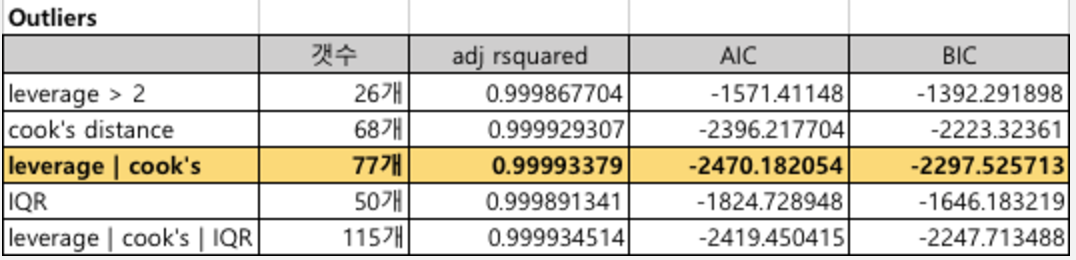

### 3-5 Data preprocessing

#### 3-5-1 Select numerical variables
- Numeric_variable_select_1 : Select the variable whose P-value is 0.05 or less among the result values of Model_1.

In [83]:
# A variable whose P-value is 0.05 or less among the result values of Model_1 are selected
idx_t = np.where(result1_1.pvalues < 0.05)[0]
p_values = idx_t.tolist()

In [84]:
# Change index value to column name
x_train_cols = train_n.columns.tolist()

numeric_variable_select_1 = []

for i in p_values:
    numeric_variable_select_1.append(x_train_cols[i])

In [86]:
# Except for PoolArea, 1stFlrArea with many none values and scale error
numeric_variable_select_1 = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'YrSold']
print("Variables Qty [The P-value of the result of Model_1 is less than 0.05] :",len(numeric_variable_select_1),"EA\n\n", \
      "Variables [The P-value of the result of Model_1 is less than 0.05]  :","\n",numeric_variable_select_1)

Variables Qty [The P-value of the result of Model_1 is less than 0.05] : 18 개

 Variables [The P-value of the result of Model_1 is less than 0.05]  : 
 ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'YrSold']


- Numeric_variable_select_2 : Select variable based on VIF factor during numeric_variable_select_1

In [87]:
# Check VIF of numeric_variable_select_1
x_train_new = train[numeric_variable_select_1]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.values.shape[1])]
vif["features"] = x_train_new.columns
vif.sort_values("VIF Factor", ascending = True)

VIF Factor       features
16      1.169101    ScreenPorch
15      1.420685  EnclosedPorch
14      1.848788     WoodDeckSF
0       2.515890        LotArea
12      2.807139     Fireplaces
8       3.078702   BsmtFullBath
5       4.465133     BsmtFinSF1
13     12.350092     GarageCars
6      13.644366    TotalBsmtSF
9      21.701557       FullBath
10     31.045992   KitchenAbvGr
2      39.276190    OverallCond
7      49.512448      GrLivArea
1      61.974850    OverallQual
11     62.820438   TotRmsAbvGrd
3   15037.803582      YearBuilt
4   19626.651517   YearRemodAdd
17  19793.585680         YrSold

In [88]:
# Except TotRmsAbvGrd, Yearsold, YearRemodAdd due to high multi-collinearity
numeric_variable_select_2 = ['LotArea', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'OverallQual']
print("Number of variables with low multicollinearity :",len(numeric_variable_select_2),"EA\n\n", \
"Variables with low multicollinearity :","\n",numeric_variable_select_2)

Number of variables with low multicollinearity : 15 EA

 Variables with low multicollinearity : 
 ['LotArea', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'OverallQual']


- numeric_variable_select_3 : 14 variables with high correlation coefficient

In [89]:
numeric_variable_select_3 = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1']
print("Number of variables with high correlation coefficient :",len(numeric_variable_select_3),"EA\n\n", \
"Variables with high correlation coefficient:","\n",numeric_variable_select_3)

Number of variables with high correlation coefficient : 11 EA

 Variables with high correlation coefficient: 
 ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1']


- numeric_variable_select_4 : The union variable of numeric_variable_select_2 and numeric_variable_select_3

In [90]:
numeric_variable_select_4= ['GarageYrBlt', 'GarageCars', 'LotArea', 'YearBuilt', 'WoodDeckSF', 'MasVnrArea', 'KitchenAbvGr', 'TotalBsmtSF', 'BsmtFullBath', 'EnclosedPorch', 'ScreenPorch', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'GrLivArea', 'FullBath', 'OverallQual', 'OverallCond']
print("Number of the union variable of numeric_variable_select_2 and numeric_variable_select_3 :",len(numeric_variable_select_4),"EA\n\n", \
"The union variable of numeric_variable_select_2 and numeric_variable_select_3 :","\n",numeric_variable_select_4)

Number of the union variable of numeric_variable_select_2 and numeric_variable_select_3 : 18 EA

 The union variable of numeric_variable_select_2 and numeric_variable_select_3 : 
 ['GarageYrBlt', 'GarageCars', 'LotArea', 'YearBuilt', 'WoodDeckSF', 'MasVnrArea', 'KitchenAbvGr', 'TotalBsmtSF', 'BsmtFullBath', 'EnclosedPorch', 'ScreenPorch', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'GrLivArea', 'FullBath', 'OverallQual', 'OverallCond']


- numeric_variable_select_5 : Select variable based on VIF factor among numeric_variable_select_4

In [91]:
# Check VIF for numeric_variable_select_4
x_train_new = train_n[numeric_variable_select_4]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.values.shape[1])]
vif["features"] = x_train_new.columns
vif.sort_values(by="VIF Factor", ascending=True)

VIF Factor       features
10    1.157152    ScreenPorch
9     1.227157  EnclosedPorch
5     1.783620     MasVnrArea
4     1.838240     WoodDeckSF
2     2.500932        LotArea
13    2.819253     Fireplaces
8     3.068433   BsmtFullBath
12    4.440559     BsmtFinSF1
7    13.968201    TotalBsmtSF
15   19.217917       FullBath
14   24.302225      GrLivArea
6    27.978482   KitchenAbvGr
17   28.006834    OverallCond
11   30.083590     GarageArea
0    31.189071    GarageYrBlt
1    38.118332     GarageCars
16   54.596105    OverallQual
3   112.803760      YearBuilt

In [92]:
# Except GarageArea, GarageYrBlt due to high multi-collinearity
numeric_variable_select_5 = ['GarageCars', 'LotArea', 'YearBuilt', 'WoodDeckSF', 'MasVnrArea', 'KitchenAbvGr', 'TotalBsmtSF', 'BsmtFullBath', 'EnclosedPorch', 'ScreenPorch', 'BsmtFinSF1', 'Fireplaces', 'GrLivArea', 'FullBath', 'OverallQual', 'OverallCond']
print("Number of variables with low VIF factor among numeric_variable_select_4 :",len(numeric_variable_select_5),"개\n\n", \
"Variables with low VIF factor among numeric_variable_select_4 :","\n",numeric_variable_select_5)

Number of variables with low VIF factor among numeric_variable_select_4 : 16 개

 Variables with low VIF factor among numeric_variable_select_4 : 
 ['GarageCars', 'LotArea', 'YearBuilt', 'WoodDeckSF', 'MasVnrArea', 'KitchenAbvGr', 'TotalBsmtSF', 'BsmtFullBath', 'EnclosedPorch', 'ScreenPorch', 'BsmtFinSF1', 'Fireplaces', 'GrLivArea', 'FullBath', 'OverallQual', 'OverallCond']


#### 3-5-2 Select categorical variables
- Categorical_variable_select_1 : The 5 variables with high correlation coefficients used in Model_5, excluding PoolQC

In [97]:
categorical_variable_select_1 = ['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual']

print("Number of variables with high correlation coefficient :",len(categorical_variable_select_1),"EA\n\n", \
"Variables with high correlation coefficient :","\n", categorical_variable_select_1)

Number of variables with high correlation coefficient : 4 EA

 Variables with high correlation coefficient : 
 ['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual']


- categorical_variable_select_2 : Select the variable whose P-value is less than 0.005 among the result values of Model_3.

In [102]:
# Excluding 'Condition2', 'RoofMatl', and 'Functional' in category variables
categorical_variable_select_2 = ['MSZoning', 'Neighborhood']
print("Number of variables [The P-value of the result of Model_3 is less than 0.05] :",len(categorical_variable_select_2),"EA\n\n", \
"Variables [The P-value of the result of Model_3 is less than 0.05] :","\n",categorical_variable_select_2)

Number of variables [The P-value of the result of Model_3 is less than 0.05] : 2 EA

 Variables [The P-value of the result of Model_3 is less than 0.05] : 
 ['MSZoning', 'Neighborhood']


- categorical_variable_select_3 : The union variable for categorical_variable_select_1 and categorical_variable_select_2

In [103]:
categorical_variable_select_3 = ['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual', 'MSZoning']
print("Number of the union variable for categorical_variable_select_1 and categorical_variable_select_2 :",len(categorical_variable_select_3),"EA\n\n", \
"The union variable for categorical_variable_select_1 and categorical_variable_select_2 :","\n", categorical_variable_select_3)

Number of the union variable for categorical_variable_select_1 and categorical_variable_select_2 : 5 EA

 The union variable for categorical_variable_select_1 and categorical_variable_select_2 : 
 ['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual', 'MSZoning']


#### Comment :

1. Turn numerical variables first and compare performance

2. Fix the best variable among the numerical variables, add the categorical variables, and compare

3. Performance with numeric_variable_select_1 and categorical_variable_select_3 together turned out to be the best

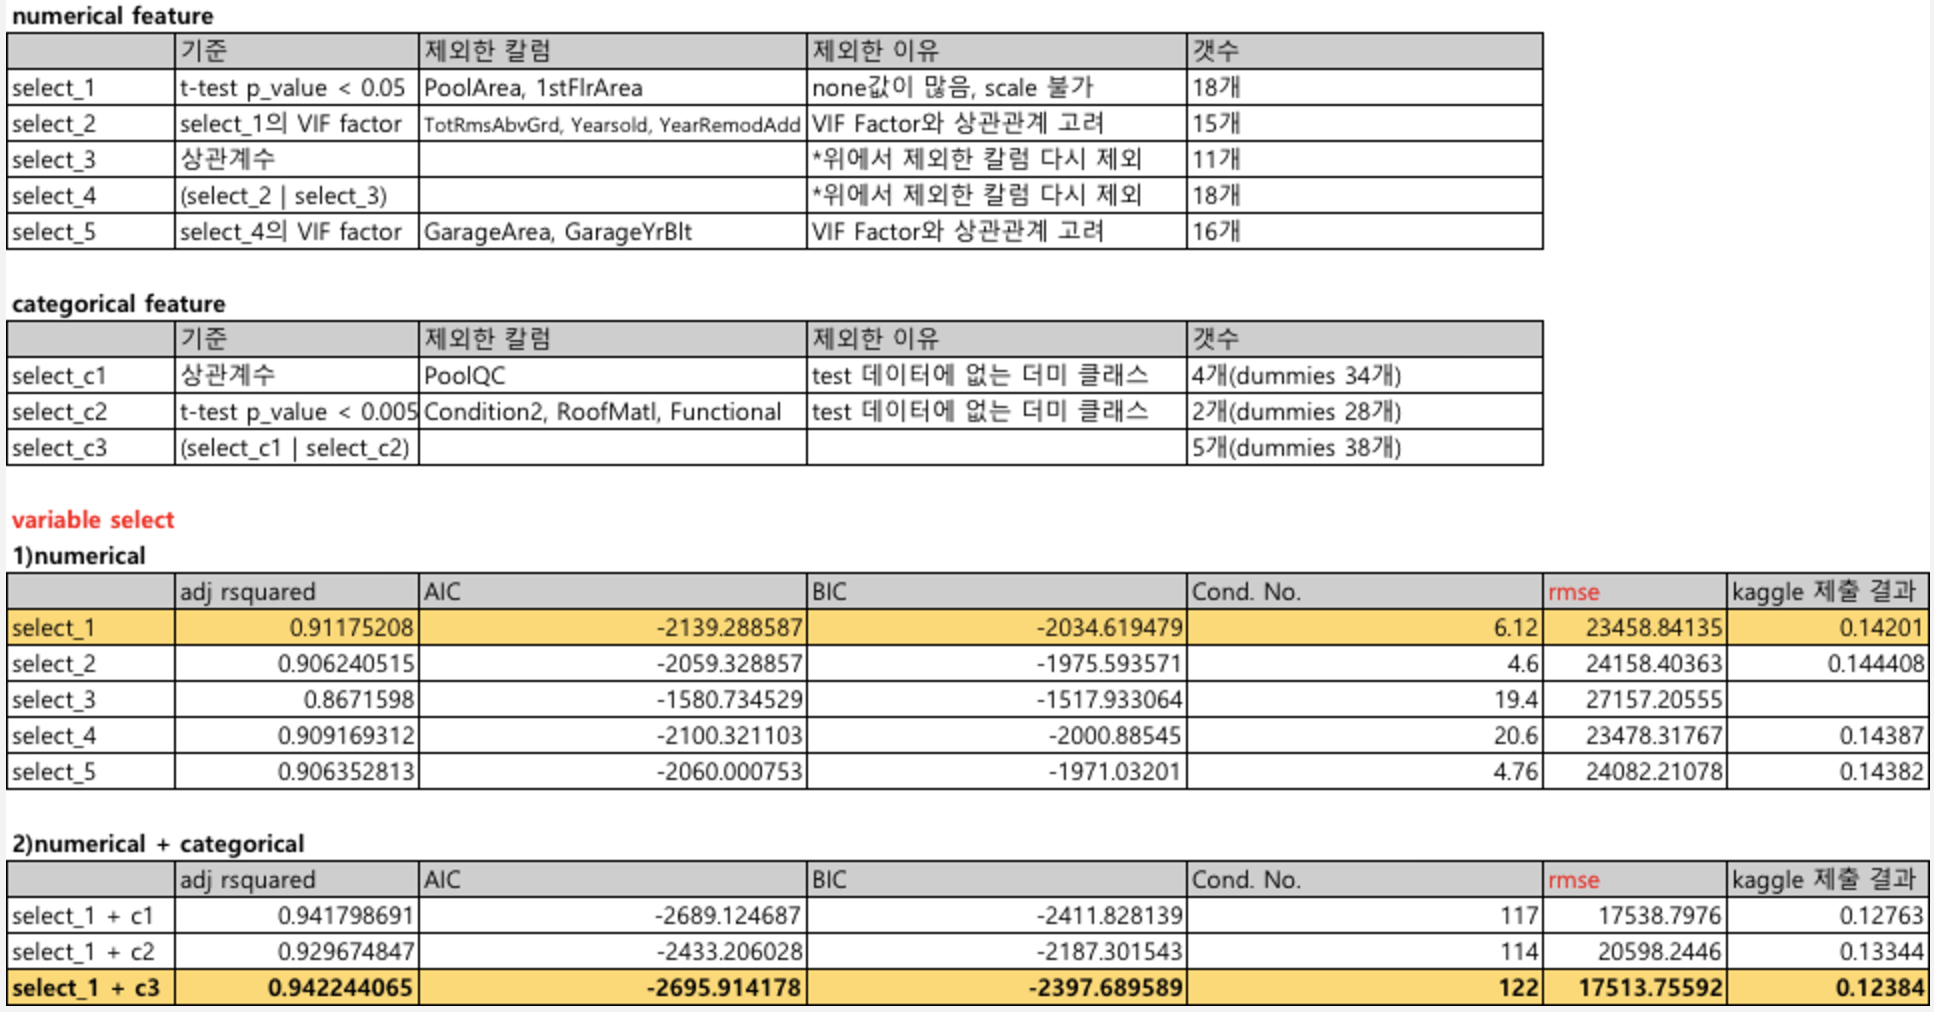

## 4. Model

### 4-1 Input data

In [105]:
# Remove outliers after selecting variables
train_n = train_n[numeric_variable_select_1]
train_n = train_n.drop(resid_cooks)

train_c = train[categorical_variable_select_3]
train_c = train_c.drop(resid_cooks)

# Numerical variable log conversion
train_n = np.log1p(train_n)

# numerical + categorical
x_train_new = pd.concat([train_n, train_c], axis=1)

# Remove SalePrice Outlier
y_train_new = y_train_d.drop(resid_cooks)

# SalePrice log conversion
y_train_new = np.log1p(y_train_new)

# Make data
train_new = pd.concat([y_train_new, x_train_new], axis=1)
train_new.tail()

SalePrice   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1455  12.072547  8.976894     1.945910     1.791759   7.600902      7.601402   
1456  12.254868  9.486152     1.945910     1.945910   7.590347      7.595387   
1457  12.493133  9.109746     2.079442     2.302585   7.571474      7.604396   
1458  11.864469  9.181735     1.791759     1.945910   7.576097      7.599401   
1459  11.901590  9.204121     1.791759     1.945910   7.583756      7.583756   

      BsmtFinSF1  TotalBsmtSF  GrLivArea  BsmtFullBath   ...     GarageCars  \
1455    0.000000     6.860664   7.407318      0.000000   ...       1.098612   
1456    6.673298     7.341484   7.637234      0.693147   ...       1.098612   
1457    5.620401     7.050123   7.758333      0.000000   ...       0.693147   
1458    3.912023     6.983790   6.983790      0.693147   ...       0.693147   
1459    6.722630     7.136483   7.136483      0.693147   ...       0.693147   

      WoodDeckSF  EnclosedPorch  ScreenPorch    YrSold  Neighborhood  \
1455    0.000000       0.000000          0.0  7.604894       Gilbert   
1456    5.857933       0.000000          0.0  7.606387        NWAmes   
1457    0.000000       0.000000          0.0  7.606387       Crawfor   
1458    5.905362       4.727388          0.0  7.606387         NAmes   
1459    6.602588       0.000000          0.0  7.605392       Edwards   

      ExterQual  KitchenQual  BsmtQual MSZoning  
1455         TA           TA        Gd       RL  
1456         TA           TA        Gd       RL  
1457         Ex           Gd        TA       RL  
1458         TA           Gd        TA       RL  
1459         Gd           TA        TA       RL  

[5 rows x 24 columns]

In [107]:
# In the OSL model, a scale is added to the variable name 
select_scale = []

for num in numeric_variable_select_1:
    x = "scale(" + num + ")"
    select_scale.append(x)

formula = " + ".join(select_scale)
formula

'scale(LotArea) + scale(OverallQual) + scale(OverallCond) + scale(YearBuilt) + scale(YearRemodAdd) + scale(BsmtFinSF1) + scale(TotalBsmtSF) + scale(GrLivArea) + scale(BsmtFullBath) + scale(FullBath) + scale(KitchenAbvGr) + scale(TotRmsAbvGrd) + scale(Fireplaces) + scale(GarageCars) + scale(WoodDeckSF) + scale(EnclosedPorch) + scale(ScreenPorch) + scale(YrSold)'

In [109]:
# To scale the categorical variables in the OSL model, add a scale to the variable name
c_categorical = []

for num in categorical_variable_select_3:
    x = "C(" + num + ")"
    c_categorical.append(x)

formula = " + ".join(c_categorical)
formula

'C(Neighborhood) + C(ExterQual) + C(KitchenQual) + C(BsmtQual) + C(MSZoning)'

### 4-2 OLS(Ordinary Least Square) Model

#### 4-2-1 Make OLS Model

In [110]:
# Input data into OLS model
model2_1 = sm.OLS.from_formula("SalePrice ~ scale(LotArea) + scale(OverallQual) + scale(OverallCond) + scale(YearBuilt) + scale(YearRemodAdd) + scale(BsmtFinSF1) + scale(TotalBsmtSF) + scale(GrLivArea) + scale(BsmtFullBath) + scale(FullBath) + scale(KitchenAbvGr) + scale(TotRmsAbvGrd) + scale(Fireplaces) + scale(GarageCars) + scale(WoodDeckSF) + scale(EnclosedPorch) + scale(ScreenPorch) + scale(YrSold)+C(Neighborhood) + C(ExterQual) + C(KitchenQual) + C(BsmtQual) + C(MSZoning)", data=train_new)
result2_1 = model2_1.fit()
print(result2_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     403.6
Date:                Mon, 26 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:01:33   Log-Likelihood:                 1405.0
No. Observations:                1383   AIC:                            -2696.
Df Residuals:                    1326   BIC:                            -2398.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [111]:
print("rsquared_adj :", result2_1.rsquared_adj)
print("AIC :", result2_1.aic)
print("BIC :", result2_1.bic)

rsquared_adj : 0.942244064753
AIC : -2695.91417781
BIC : -2397.6895889


#### Comments :

1. $R_{adj}^2$ value is close to 1 but residual normality does not represent normality
2. The P-value of the numeric variable is less than 0.05, which is a significant variable.
3. AIC and BIC should be low, but if negative, verification is required

#### 4-2-2 ANOVA F-test

- ANOVA F test can compare the importance of each independent variables
- Method : The influence of each independent variable is indirectly measured by comparing the performance of the model minus the whole model and only one of the variables.
- The lower the value of PR (> F), the higher the importance

In [112]:
sm.stats.anova_lm(result2_1, typ=2)

sum_sq      df           F        PR(>F)
C(Neighborhood)        1.545584    24.0    8.043706  3.464375e-26
C(ExterQual)           0.051710     3.0    2.152903  9.183851e-02
C(KitchenQual)         0.309043     3.0   12.866839  2.740112e-08
C(BsmtQual)            1.292596     4.0   40.362463  6.028261e-32
C(MSZoning)            0.114136     4.0    3.564009  6.710862e-03
scale(LotArea)         1.565380     1.0  195.521506  1.513273e-41
scale(OverallQual)     1.414525     1.0  176.679152  6.123949e-38
scale(OverallCond)     2.291662     1.0  286.236681  2.725836e-58
scale(YearBuilt)       1.317128     1.0  164.513908  1.383958e-35
scale(YearRemodAdd)    0.176478     1.0   22.042772  2.943050e-06
scale(BsmtFinSF1)      0.274396     1.0   34.273001  6.030416e-09
scale(TotalBsmtSF)     1.106537     1.0  138.210349  2.001195e-30
scale(GrLivArea)       3.523951     1.0  440.153938  1.281575e-84
scale(BsmtFullBath)    0.274380     1.0   34.271037  6.036351e-09
scale(FullBath)        0.051302     1.0    6.407816  1.147667e-02
scale(KitchenAbvGr)    0.303181     1.0   37.868374  1.000622e-09
scale(TotRmsAbvGrd)    0.000983     1.0    0.122802  7.260703e-01
scale(Fireplaces)      0.296931     1.0   37.087713  1.476773e-09
scale(GarageCars)      0.703703     1.0   87.895047  2.875958e-20
scale(WoodDeckSF)      0.142986     1.0   17.859398  2.541098e-05
scale(EnclosedPorch)   0.021916     1.0    2.737391  9.826133e-02
scale(ScreenPorch)     0.160153     1.0   20.003695  8.390154e-06
scale(YrSold)          0.031068     1.0    3.880489  4.905817e-02
Residual              10.616192  1326.0         NaN           NaN

#### Comments :

1. GrLivArea (living room width), which has the lowest PR (> F) of all variables, has the greatest influence on the house value
2. TotRmsAbvGrd (room quality), which has a relatively high PR (> F), has a small effect on house values

#### 4-2-3 RMSE

 - Use statsmodels.tools.eval_measures.rmse to compare actual SalePrice to SalePrice predicted by OLS

In [113]:
# Drop SalePrice from dataframe
train_new2 = train_new.drop(['SalePrice'], axis=1)

# Predict train's Saleprice
y_train_new2 = result2_1.predict(train_new2)
y_train_new2 = np.exp(y_train_new2)
y_train_new2 = np.array(y_train_new2)

In [114]:
# Actual Saleprice 
y_train_new_a = np.array(y_train_new)
y_train_new = np.exp(y_train_new_a)

# Comparison of actual SalePrice and SalePrice predicted by OLS
print("RMSE :", sm.tools.eval_measures.rmse(y_train_new, y_train_new2, axis=0))

RMSE : 17513.755921


#### 4-2-4 Normalization of residuals

 - According to the probabilistic linear regression model, the residuals in the regression analysis [$e = y - \hat{w}^Tx$] follow the normal distribution 

In [115]:
# Check the chi-squared and p-value of the residuals of the OLS model
test_norm = sms.omni_normtest(result2_1.resid)
for xi in zip(['Chi^2', 'P-value'], test_norm):
    print("%-12s: %6.3f" % xi)

Chi^2       : 56.446
P-value     :  0.000


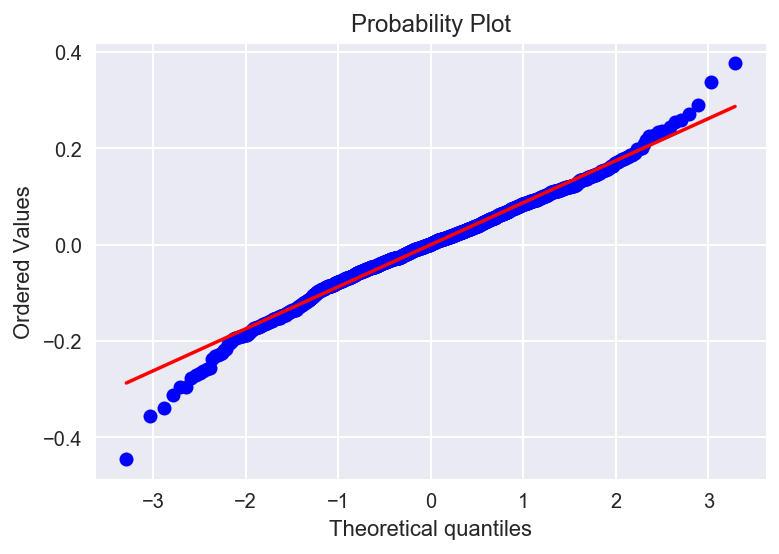

In [116]:
# Check the residual of OLS model with QQ Plot
sp.stats.probplot(result2_1.resid, plot=plt)
plt.show()

#### Comments :

1. The residuals of the OLS model do not follow normality numerically, but if we look at the Probability Plot we can see that it is close to a straight line

### 4-3 Predict SalePrice

In [118]:
# Select test data using numerical variables
test_new = test[numeric_variable_select_1]

# Normalization of numerical data of test data
test_new = np.log1p(test_new)

# Select test data using categorical variables
test_new2 = test[categorical_variable_select_3]

# combine the data
test_new = pd.concat([test_new, test_new2], axis=1)
test_new.tail()

LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF1  \
2914  7.568896     1.609438     2.079442   7.586296      7.586296    0.000000   
2915  7.546974     1.609438     1.791759   7.586296      7.586296    5.533389   
2916  9.903538     1.791759     2.079442   7.581210      7.599401    7.110696   
2917  9.253591     1.791759     1.791759   7.597396      7.597396    5.823046   
2918  9.172431     2.079442     1.791759   7.597898      7.598399    6.632002   

      TotalBsmtSF  GrLivArea  BsmtFullBath  FullBath   ...     GarageCars  \
2914     6.304449   6.996681      0.000000  0.693147   ...       0.000000   
2915     6.304449   6.996681      0.000000  0.693147   ...       0.693147   
2916     7.110696   7.110696      0.693147  0.693147   ...       1.098612   
2917     6.816736   6.878326      0.000000  0.693147   ...       0.000000   
2918     6.904751   7.601402      0.000000  1.098612   ...       1.386294   

      WoodDeckSF  EnclosedPorch  ScreenPorch    YrSold  Neighborhood  \
2914    0.000000            0.0          0.0  7.604396       MeadowV   
2915    0.000000            0.0          0.0  7.604396       MeadowV   
2916    6.163315            0.0          0.0  7.604396       Mitchel   
2917    4.394449            0.0          0.0  7.604396       Mitchel   
2918    5.252273            0.0          0.0  7.604396       Mitchel   

      ExterQual  KitchenQual BsmtQual MSZoning  
2914         TA           TA       TA       RM  
2915         TA           TA       TA       RM  
2916         TA           TA       TA       RL  
2917         TA           TA       Gd       RL  
2918         TA           TA       Gd       RL  

[5 rows x 23 columns]

In [119]:
# Input test data processed in OLS model
y_new = result2_1.predict(test_new)

# Exponentional conversion of predicted test data values to actual prices
y_new = np.exp(y_new)

# Converted to an array format to write predicted values to the csv file for submission
y_new = np.array(y_new)
print(y_new)

[ 120441.3726321   157334.66257512  183420.82669352 ...,  179300.64692553
  119813.25276318  213320.3132828 ]


In [121]:
# Import sample file
submission = pd.read_csv("../1_House_Price_Project_X/Submit/sample_submission.csv")

# Write the predicted price in the SalePrice of the sample file
submission["SalePrice"] = y_new

# Check the sample file that was written
print(submission.shape)
submission.head()

(1459, 2)


Id      SalePrice
0  1461  120441.372632
1  1462  157334.662575
2  1463  183420.826694
3  1464  197570.965466
4  1465  195688.650661

In [ ]:
# Output to csv file format
submission.to_csv("1_submission.csv", index=False)